<a href="https://colab.research.google.com/github/GitZy6666/ZyRep/blob/main/Return_Saham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("Sahambaru.csv")

In [ ]:
data.head(n=10)

Date  ACES  ADRO  AKRA  ...        TPIA   UNTR  UNVR         WIKA
0  30/12/2013   640  1010  4475  ...  569.353088  19550  5300  1537.281860
1  06/01/2014   680   940  4520  ...  545.793640  19000  5180  1648.410645
2  13/01/2014   735   975  4685  ...  549.720215  19300  5530  1810.473511
3  20/01/2014   735  1040  4470  ...  549.720215  19700  5615  1778.060913
4  27/01/2014   760   950  4400  ...  569.353088  19300  5710  1805.843140
5  03/02/2014   785   905  4285  ...  500.638062  18200  5645  1879.929077
6  10/02/2014   810   945  4500  ...  481.005188  18300  5675  1875.298706
7  17/02/2014   830   970  4575  ...  483.950134  18600  5680  1847.516479
8  24/02/2014   800   995  4560  ...  497.693146  18975  5715  1986.427490
9  03/03/2014   795  1015  4745  ...  472.170410  19400  5625  2069.774170

[10 rows x 42 columns]

In [ ]:
from datetime import datetime as dt

weeklydate = pd.to_datetime(data.Date)
weeklydate = weeklydate.dt.strftime("%d-%m-%Y")
weeklydate = pd.to_datetime(weeklydate)
weeklydate

0     2013-12-30
1     2014-01-06
2     2014-01-13
3     2014-01-20
4     2014-01-27
         ...    
361   2020-11-30
362   2020-12-07
363   2020-12-14
364   2020-12-21
365   2020-12-28
Name: Date, Length: 366, dtype: datetime64[ns]

In [ ]:
return_saham = pd.DataFrame(weeklydate)
cum_returns_saham = pd.DataFrame(weeklydate)

for i in range(1, len(data.columns)):
  
  saham = data.columns[i]
  weekly_returns = data[saham].pct_change()
  cum_returns = (weekly_returns + 1).cumprod()
  return_saham[saham] = weekly_returns
  cum_returns_saham[saham] = cum_returns

In [ ]:
return_saham

Date      ACES      ADRO  ...      UNTR      UNVR      WIKA
0   2013-12-30       NaN       NaN  ...       NaN       NaN       NaN
1   2014-01-06  0.062500 -0.069307  ... -0.028133 -0.022642  0.072289
2   2014-01-13  0.080882  0.037234  ...  0.015789  0.067568  0.098315
3   2014-01-20  0.000000  0.066667  ...  0.020725  0.015371 -0.017903
4   2014-01-27  0.034014 -0.086538  ... -0.020305  0.016919  0.015625
..         ...       ...       ...  ...       ...       ...       ...
361 2020-11-30 -0.021084  0.032374  ...  0.071790 -0.019355  0.076696
362 2020-12-07  0.049231  0.069686  ... -0.013208 -0.016447 -0.021918
363 2020-12-14  0.085044 -0.035831  ...  0.018164  0.016722  0.109244
364 2020-12-21 -0.037838  0.006757  ... -0.020657 -0.023026  0.000000
365 2020-12-28  0.002809  0.010067  ...  0.032598  0.003367  0.015152

[366 rows x 42 columns]

In [ ]:
cum_returns_saham

Date      ACES      ADRO  ...      UNTR      UNVR      WIKA
0   2013-12-30       NaN       NaN  ...       NaN       NaN       NaN
1   2014-01-06  1.062500  0.930693  ...  0.971867  0.977358  1.072289
2   2014-01-13  1.148438  0.965347  ...  0.987212  1.043396  1.177711
3   2014-01-20  1.148438  1.029703  ...  1.007673  1.059434  1.156626
4   2014-01-27  1.187500  0.940594  ...  0.987212  1.077358  1.174699
..         ...       ...       ...  ...       ...       ...       ...
361 2020-11-30  2.539063  1.420792  ...  1.355499  1.433962  1.187160
362 2020-12-07  2.664063  1.519802  ...  1.337596  1.410377  1.161140
363 2020-12-14  2.890625  1.465347  ...  1.361893  1.433962  1.287988
364 2020-12-21  2.781250  1.475248  ...  1.333760  1.400943  1.287988
365 2020-12-28  2.789063  1.490099  ...  1.377238  1.405660  1.307503

[366 rows x 42 columns]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker

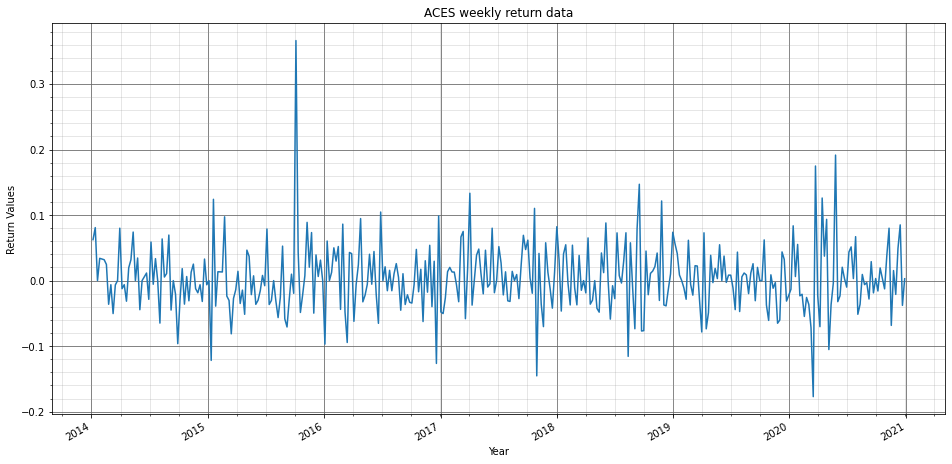

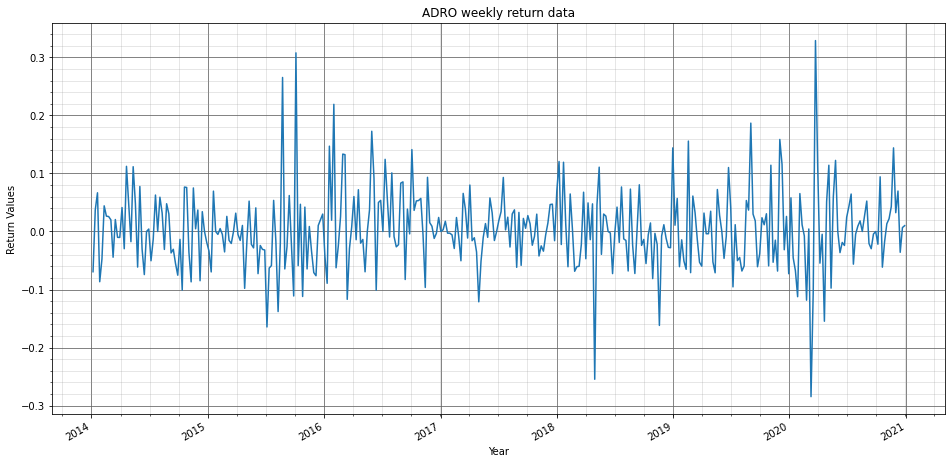

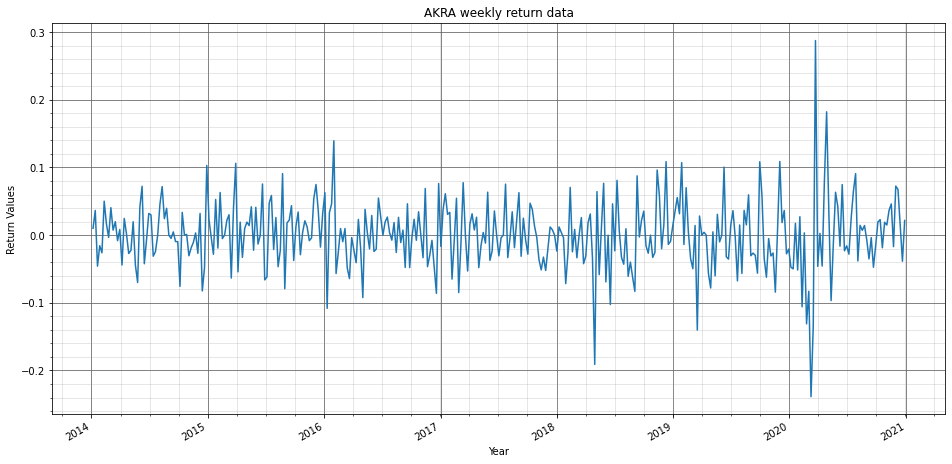

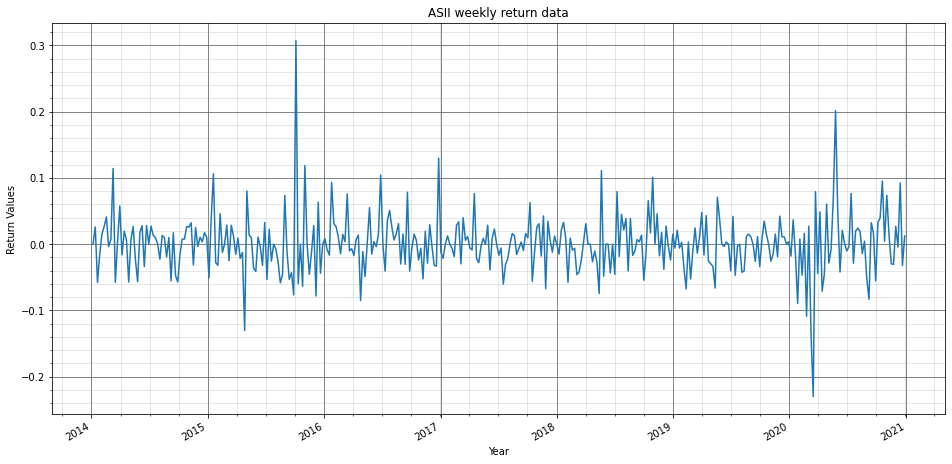

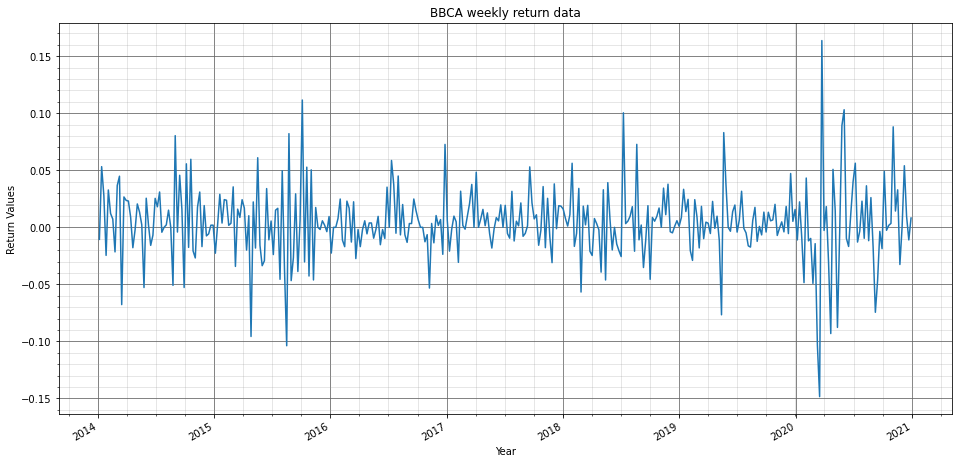

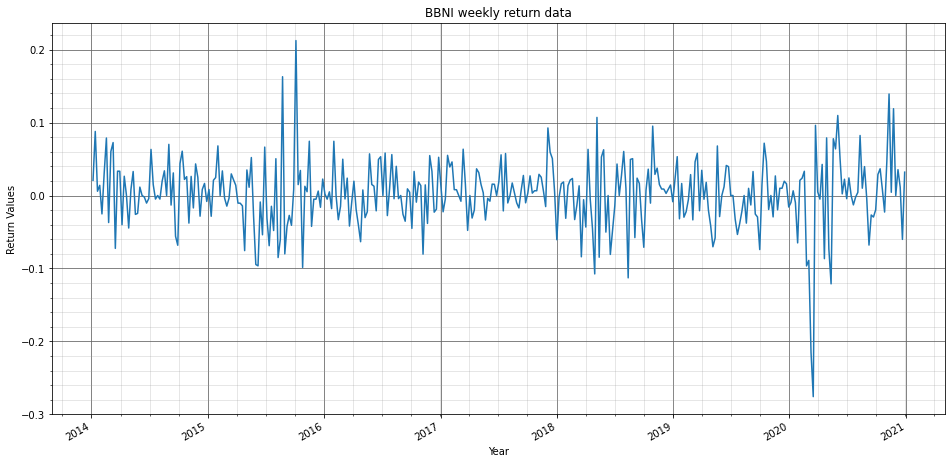

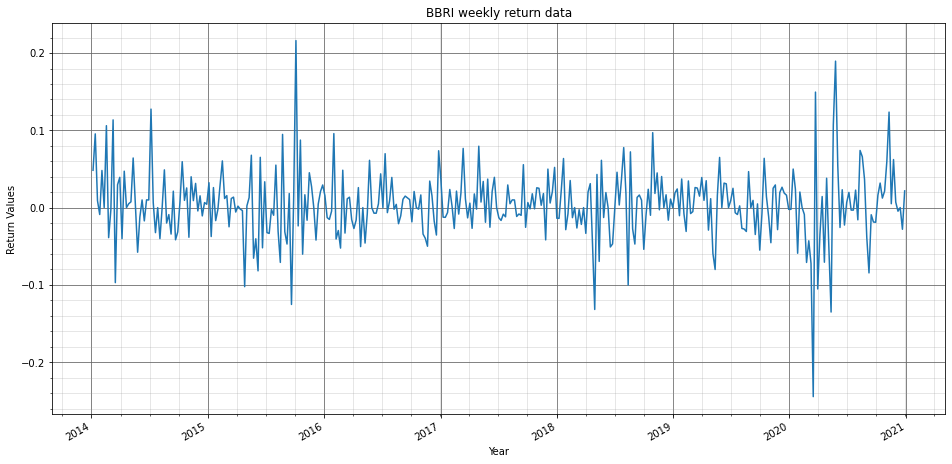

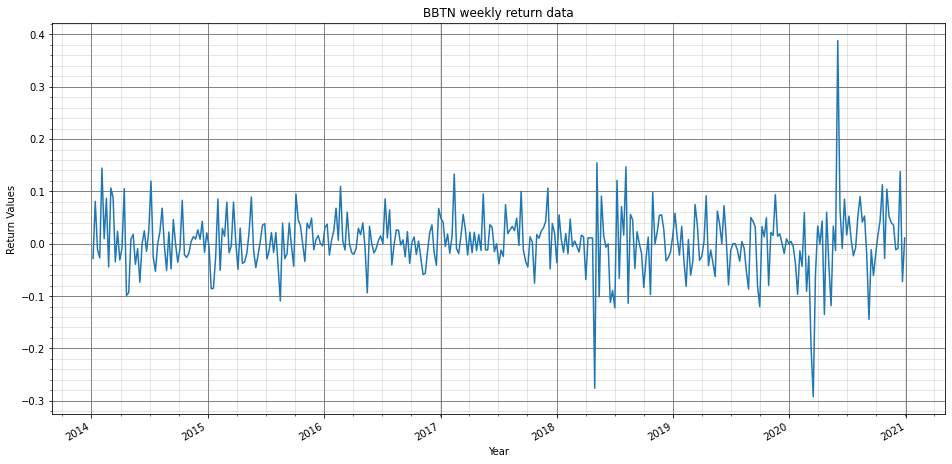

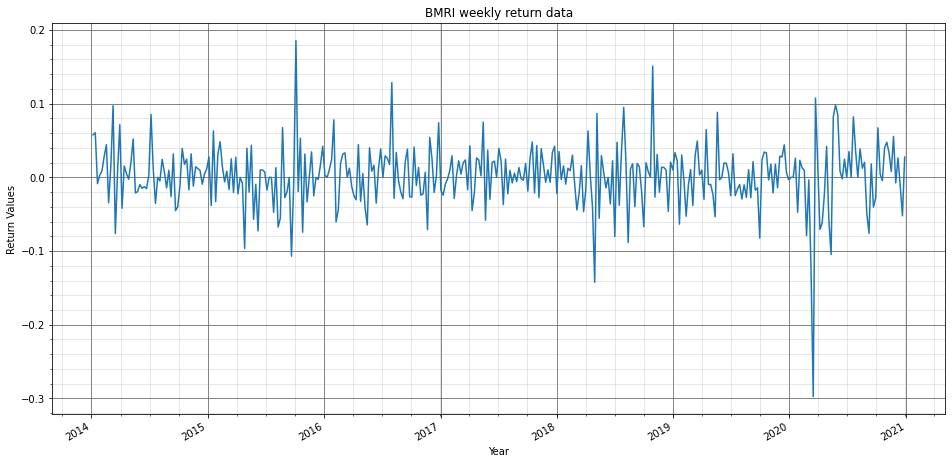

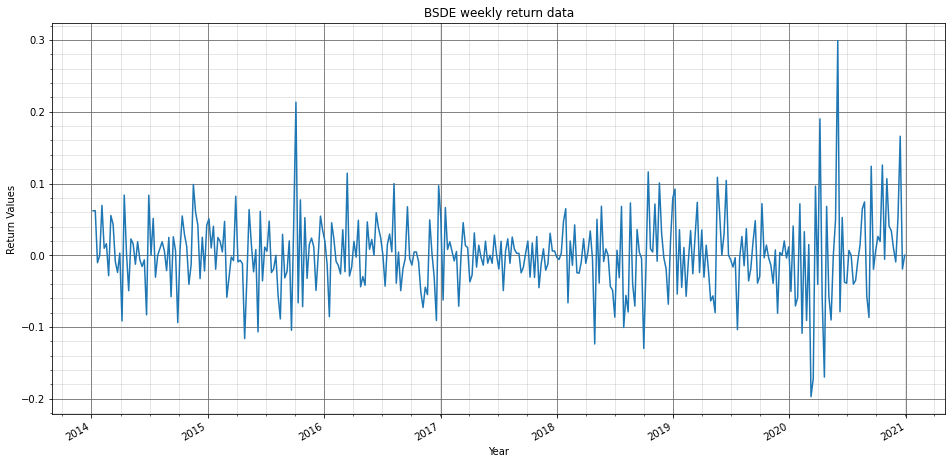

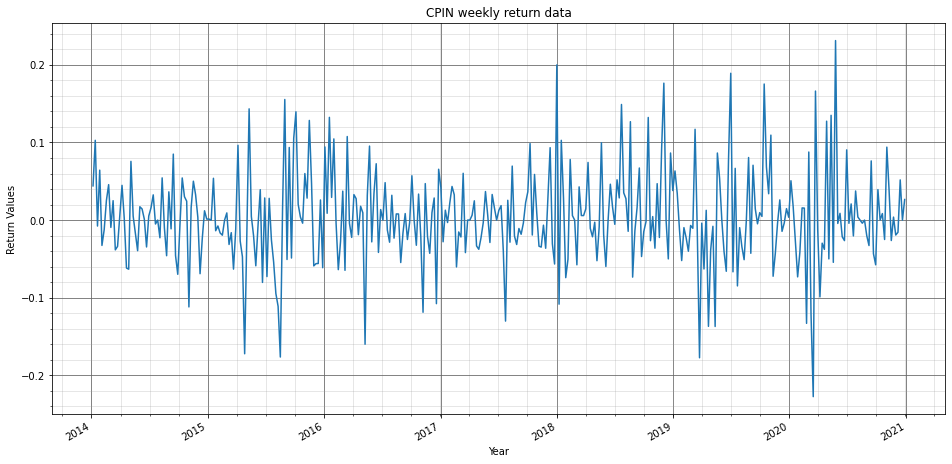

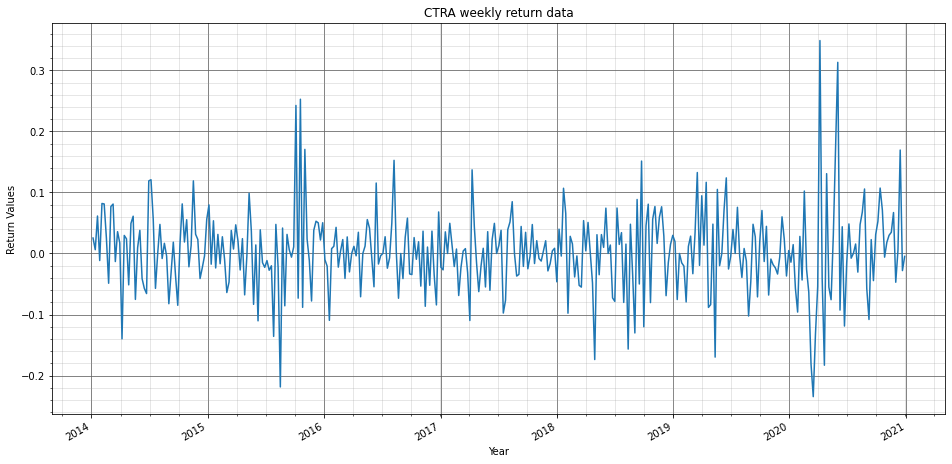

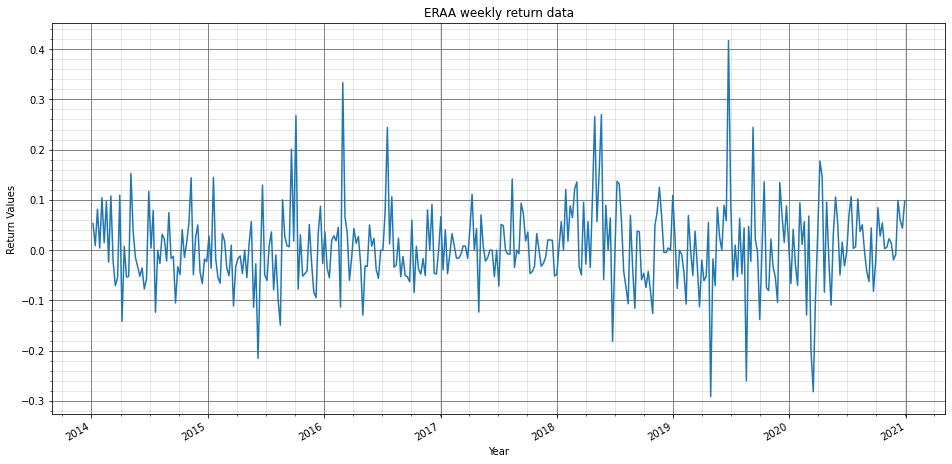

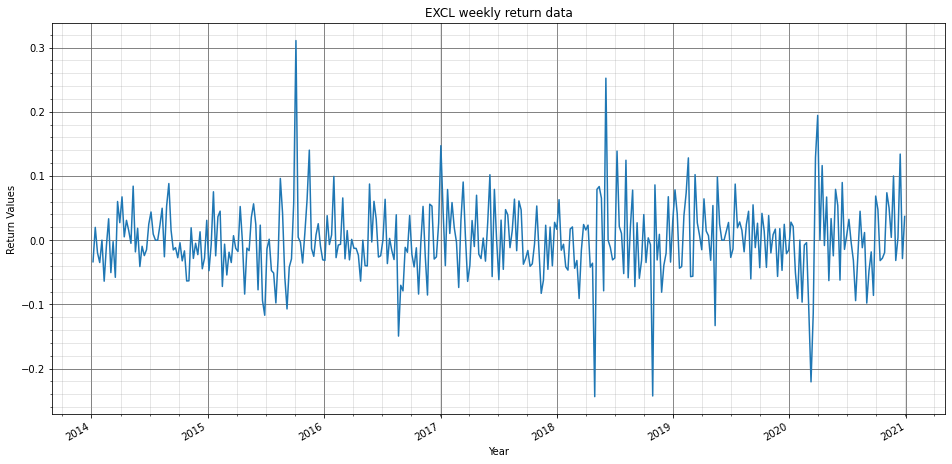

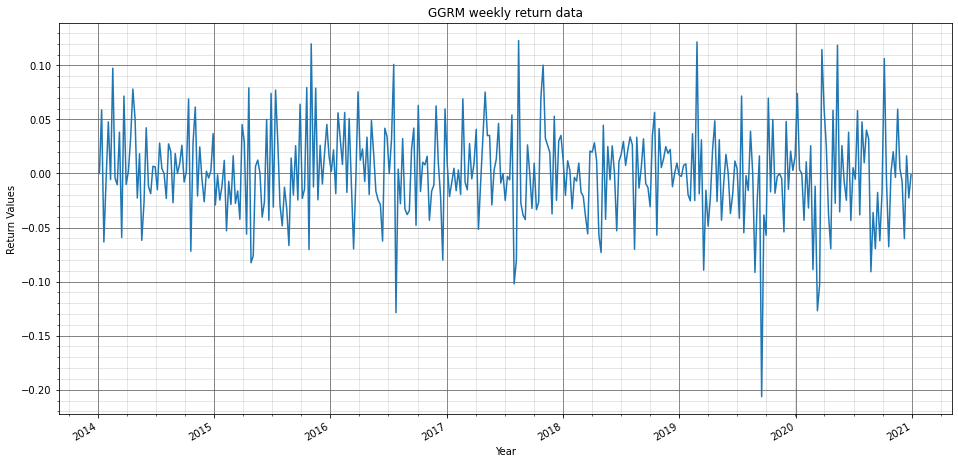

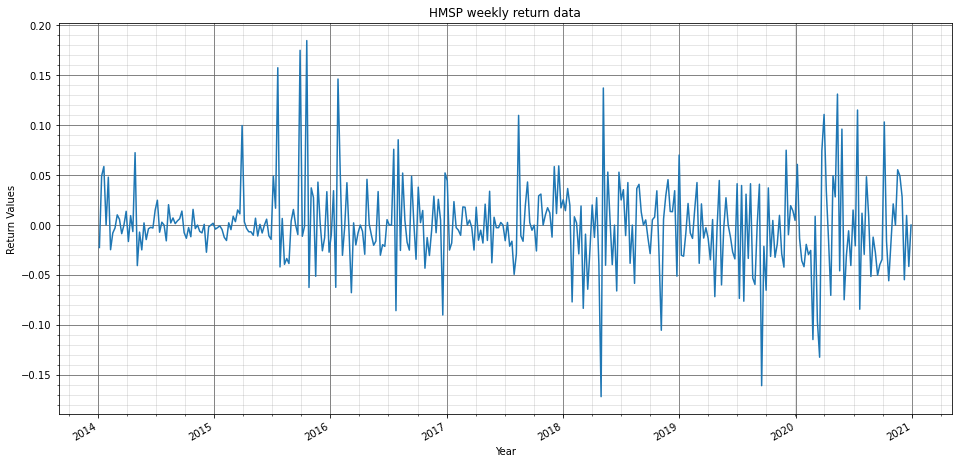

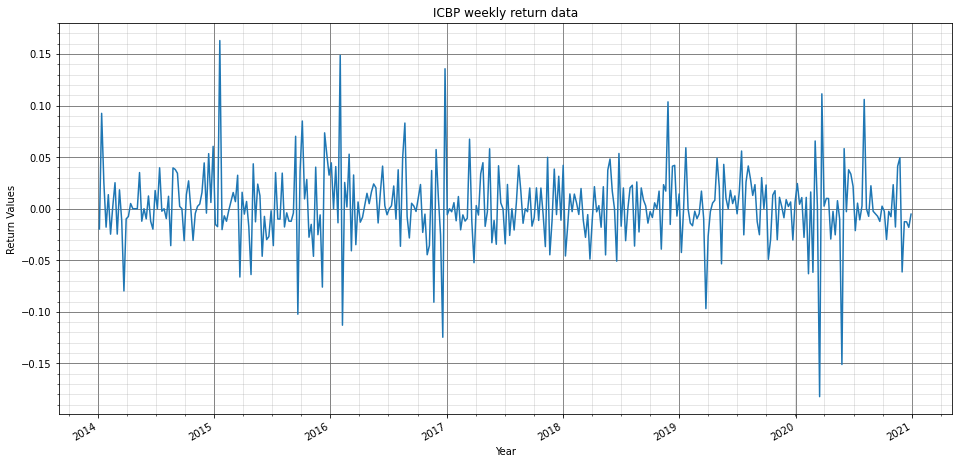

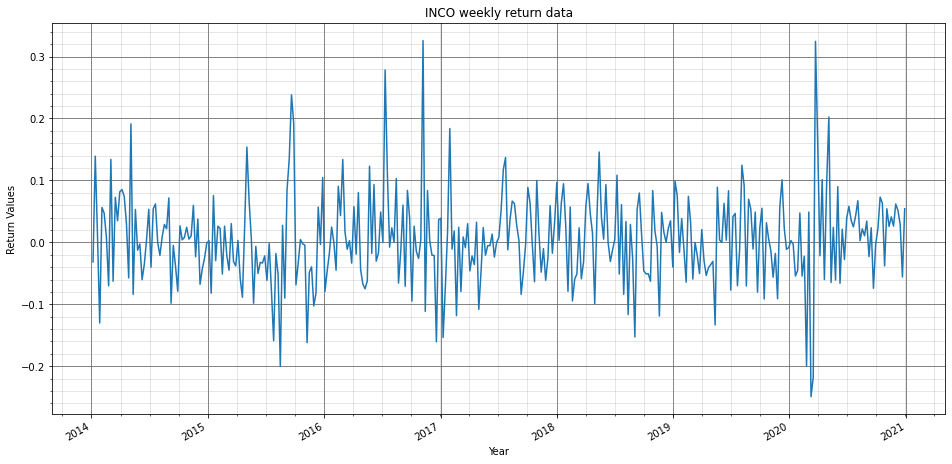

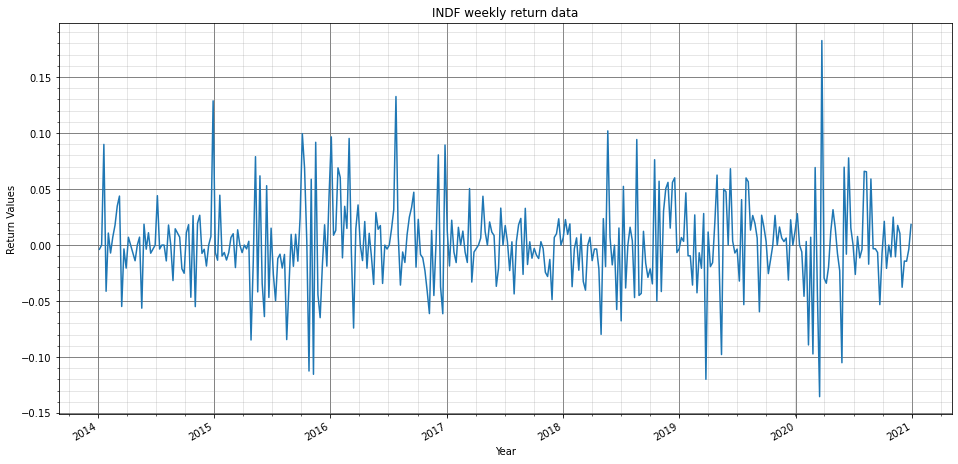

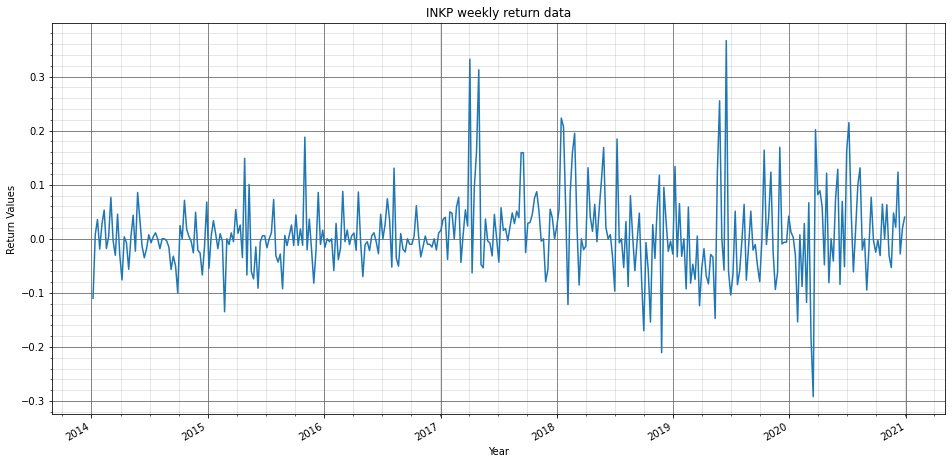

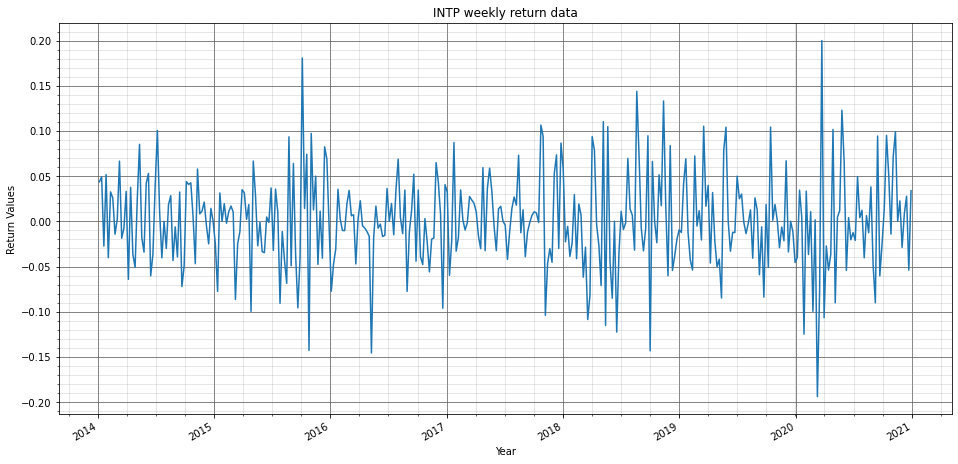

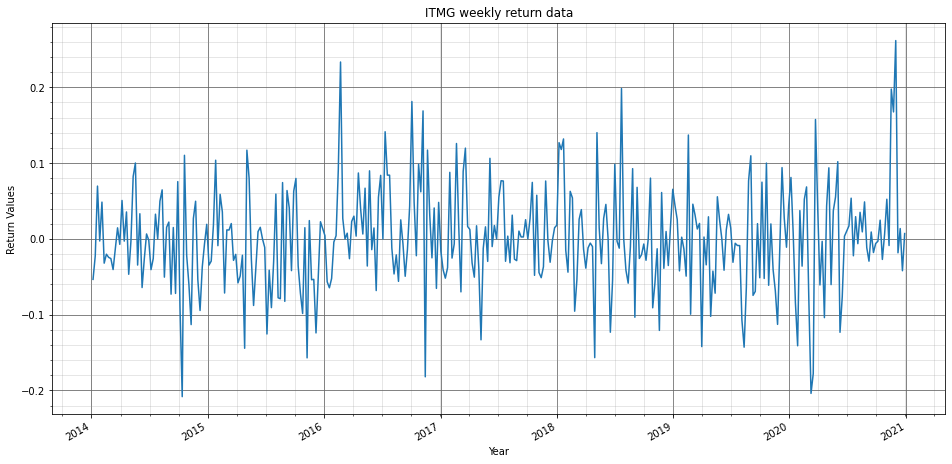

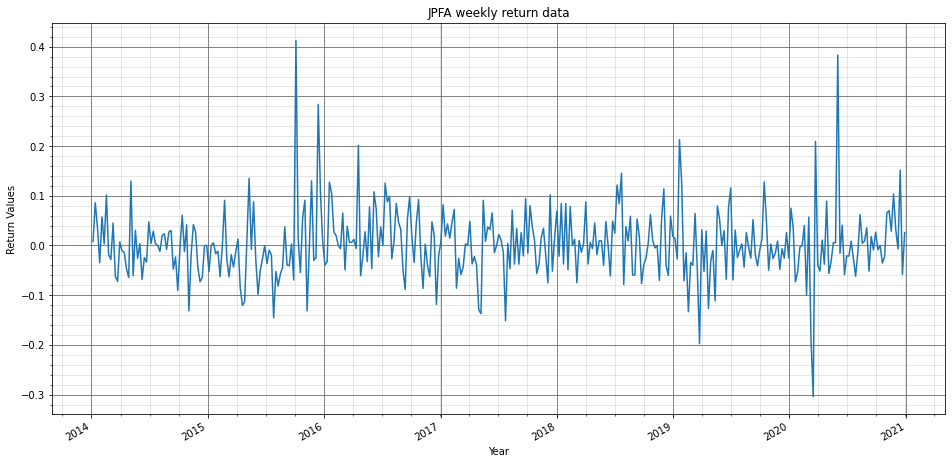

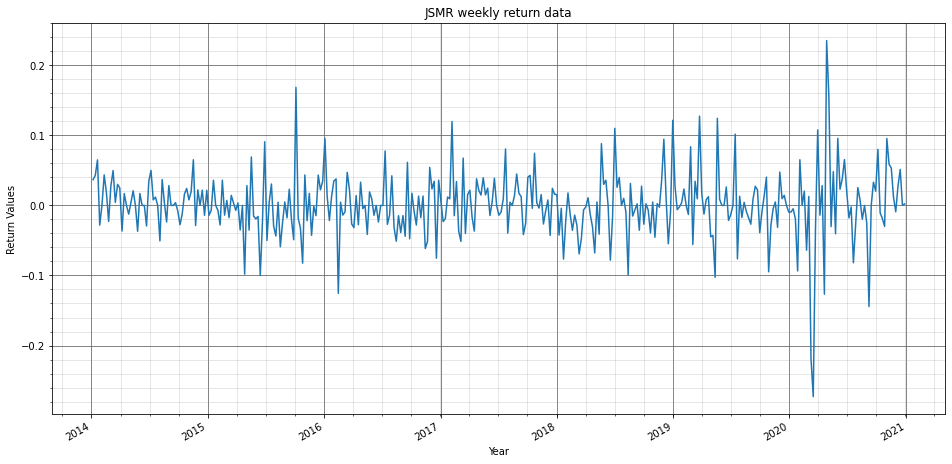

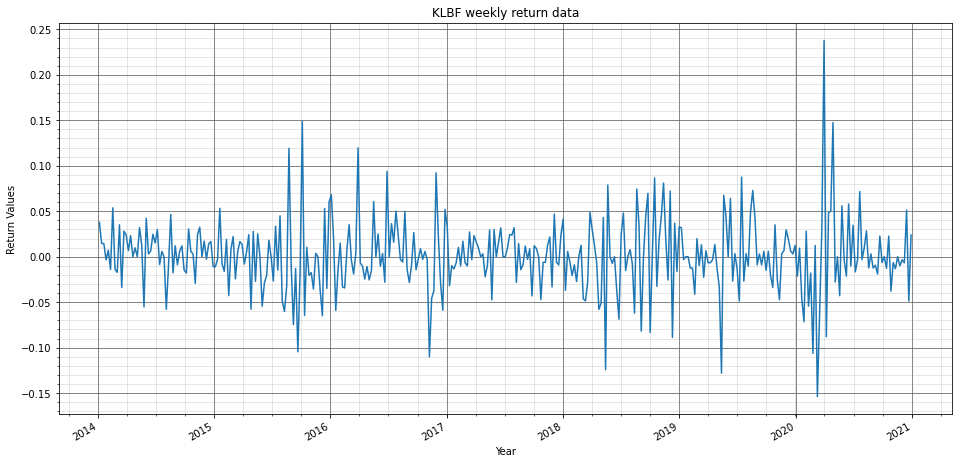

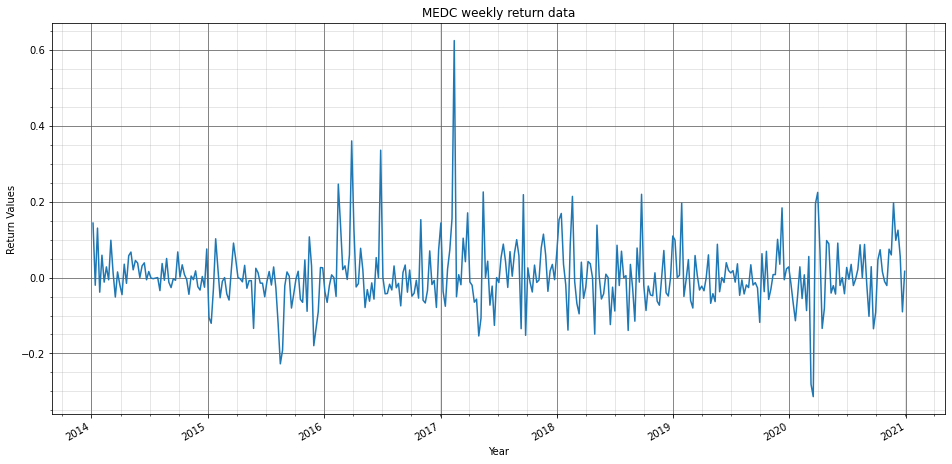

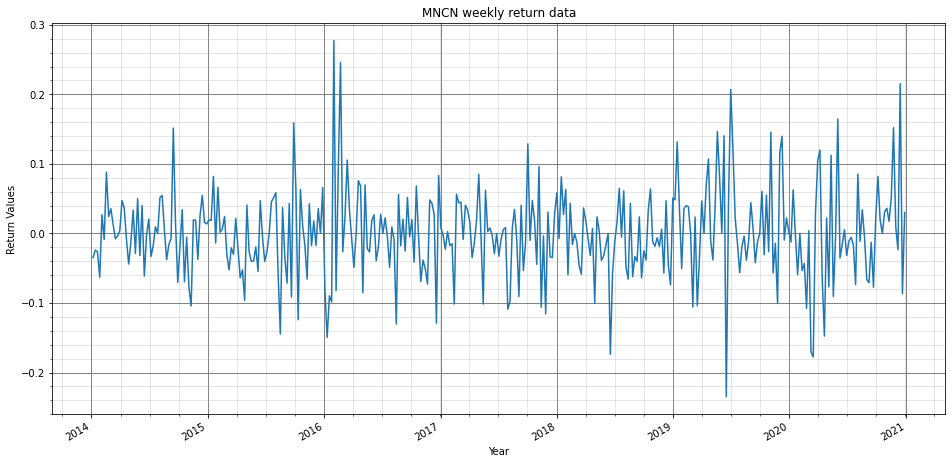

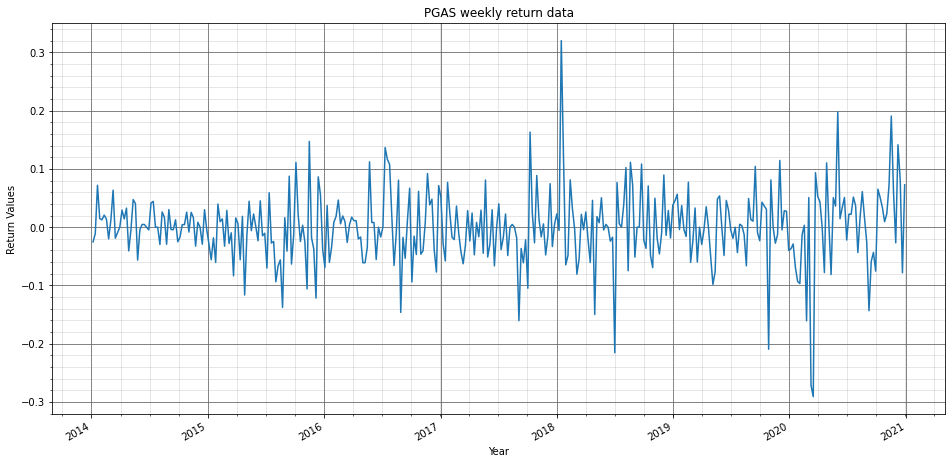

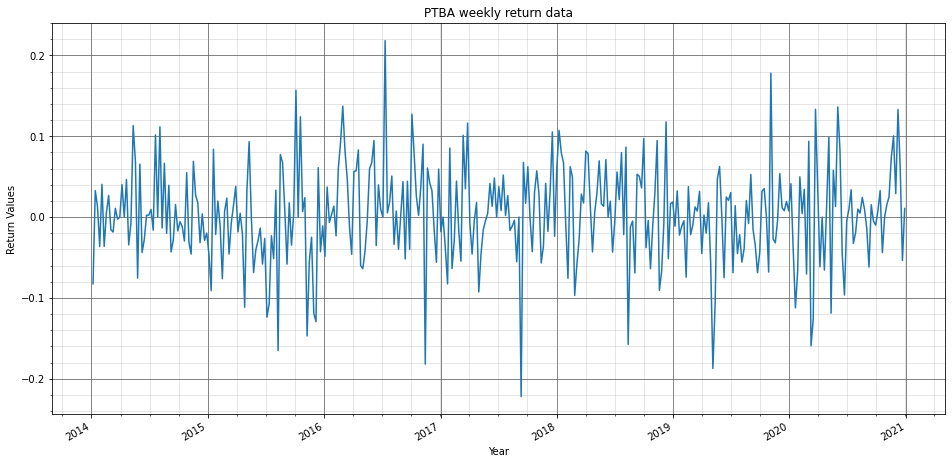

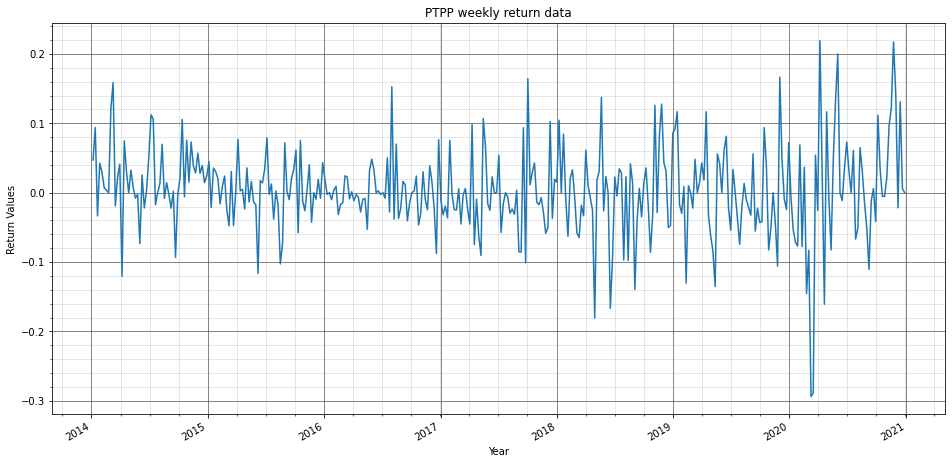

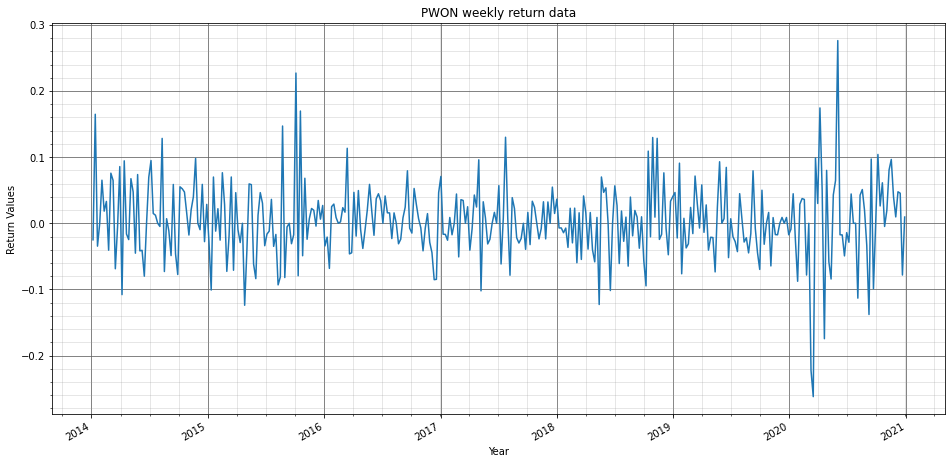

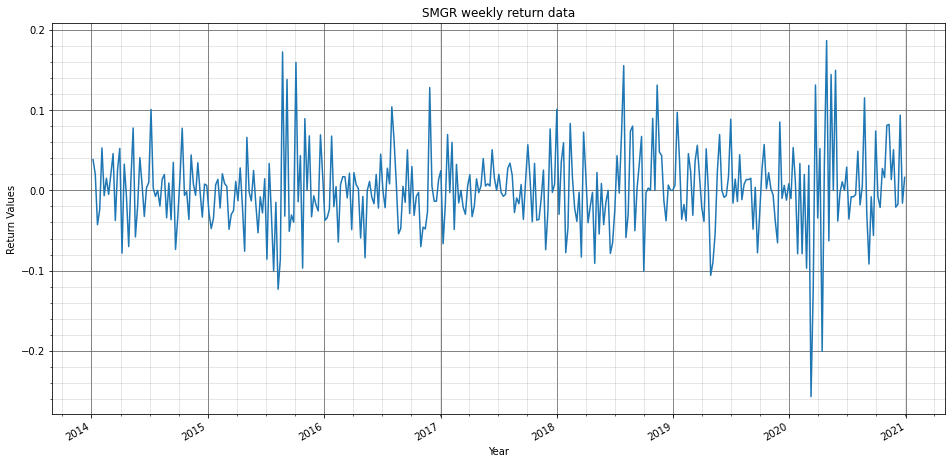

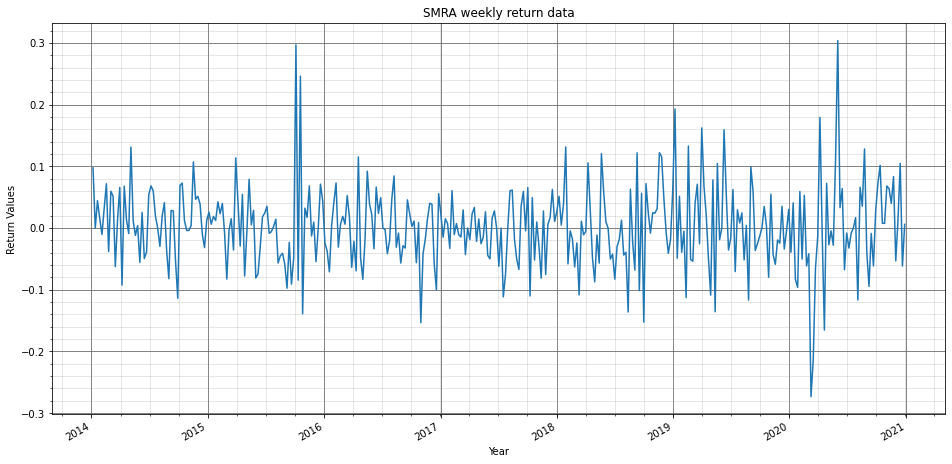

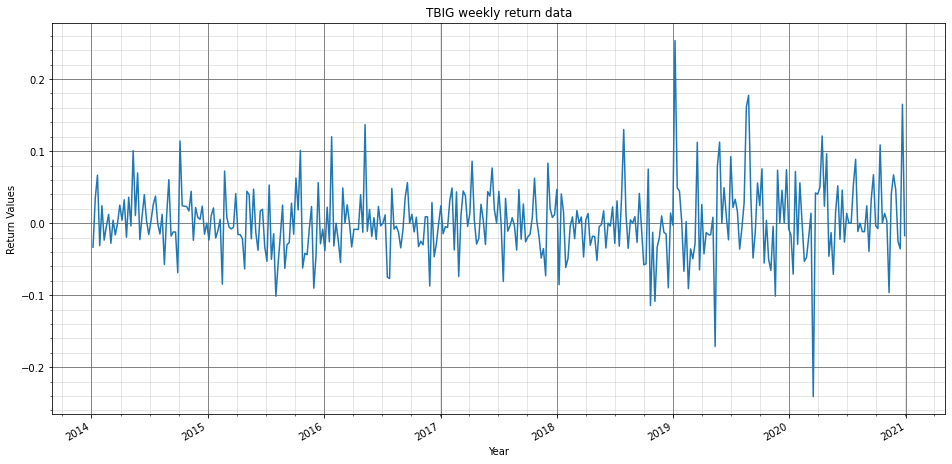

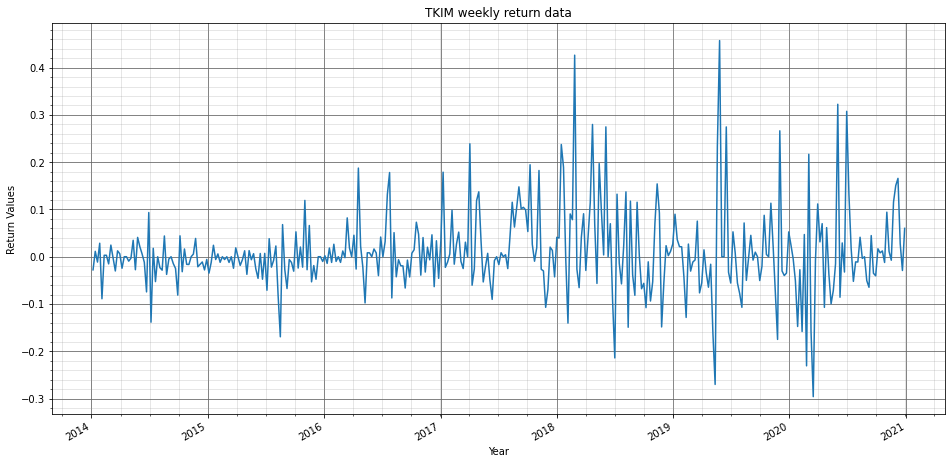

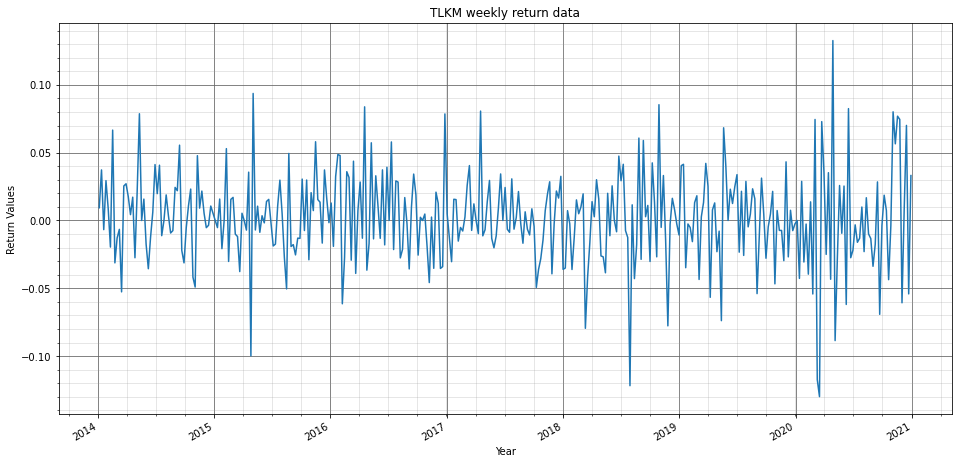

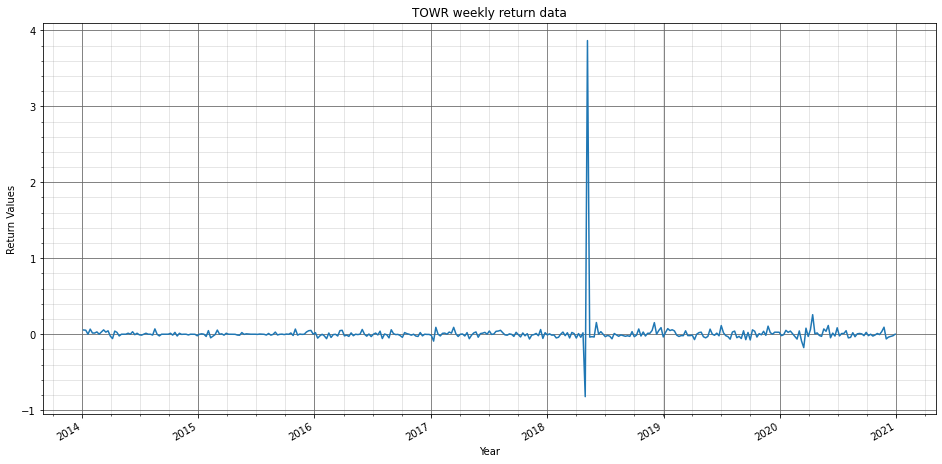

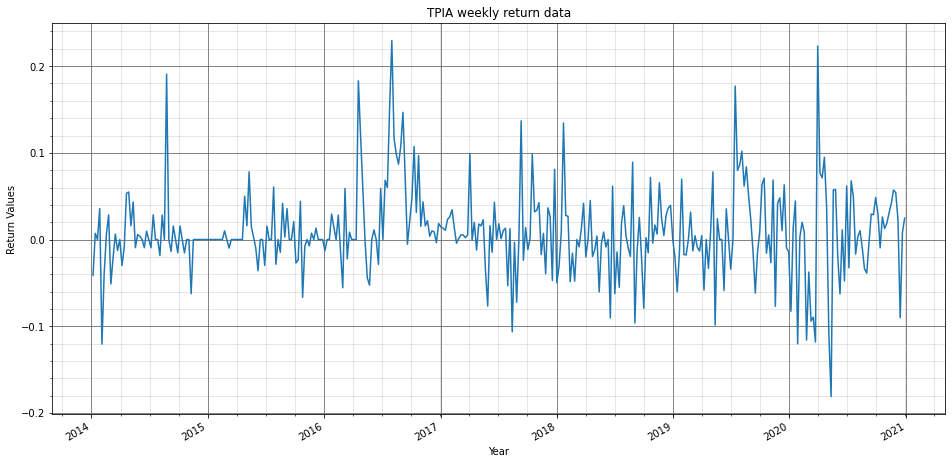

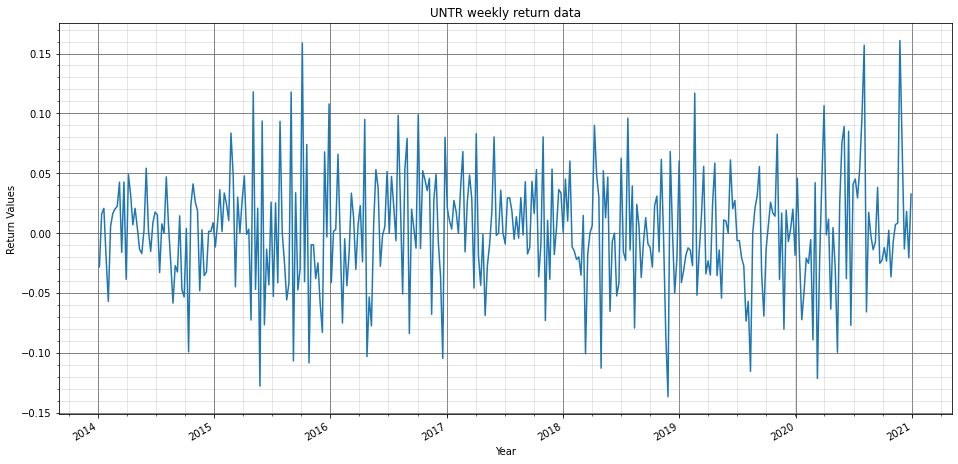

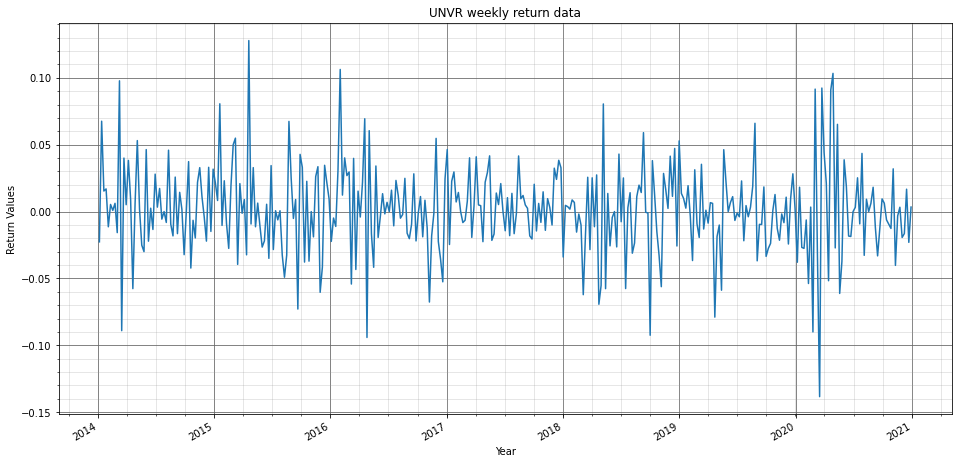

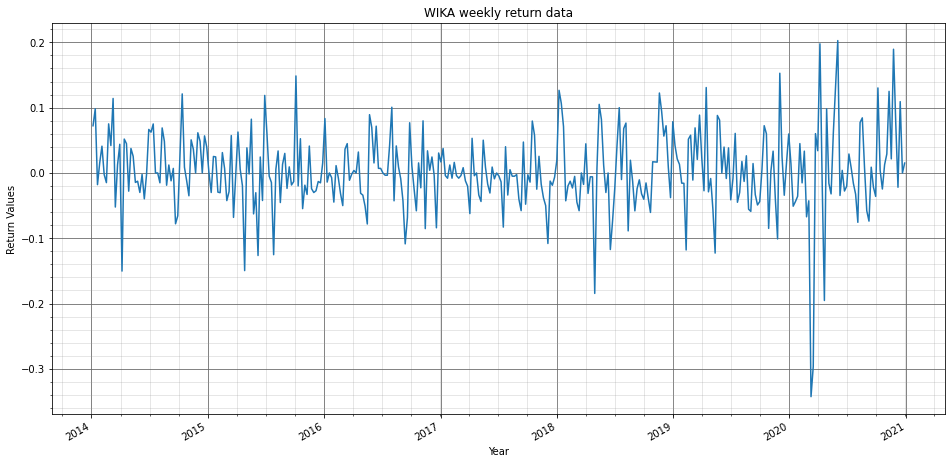

In [ ]:
for i in range(1, len(return_saham.columns)):
  
  saham = data.columns[i]
  plt.figure(figsize=(16,8))
  plt.title(str(saham)+" weekly return data")
  plt.grid(True,  which='major', color='#666666', linestyle='-')
  plt.plot(weeklydate, return_saham[saham])
  plt.xlabel('Year')
  plt.ylabel('Return Values')
  plt.minorticks_on()
  plt.xticks(rotation = 50)
  plt.gcf().autofmt_xdate()
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
  plt.savefig(str(saham)+" weekly return data")
  plt.show()

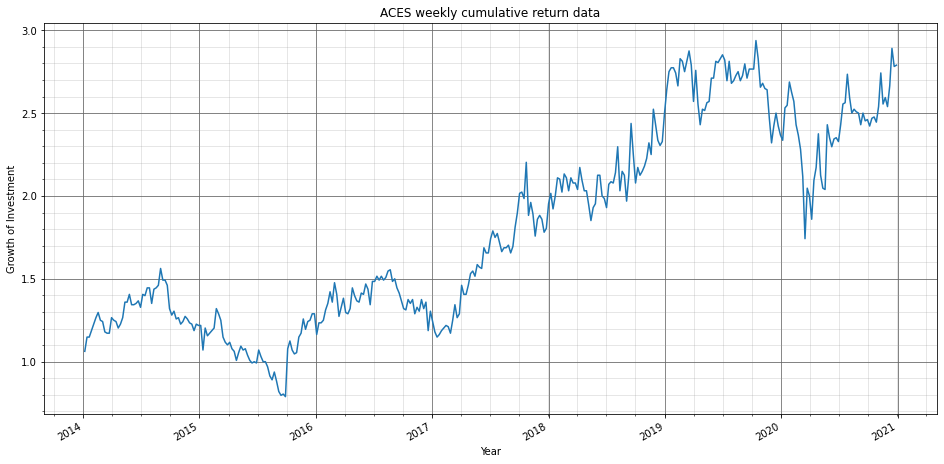

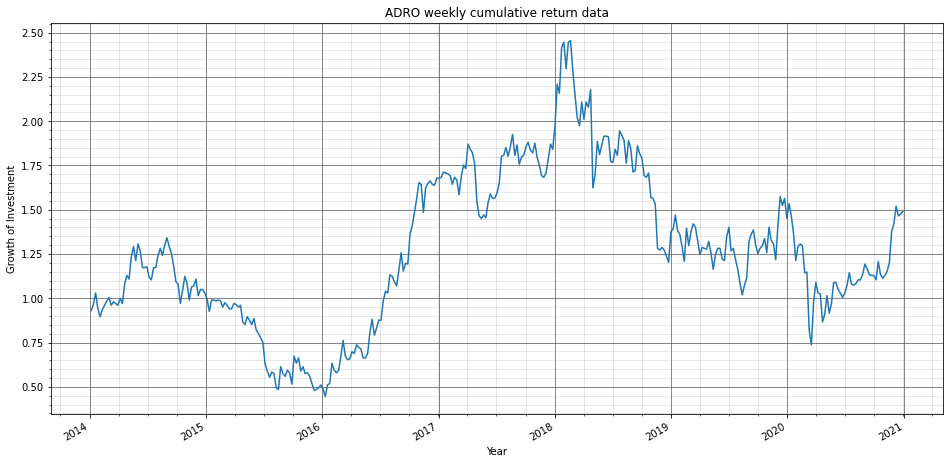

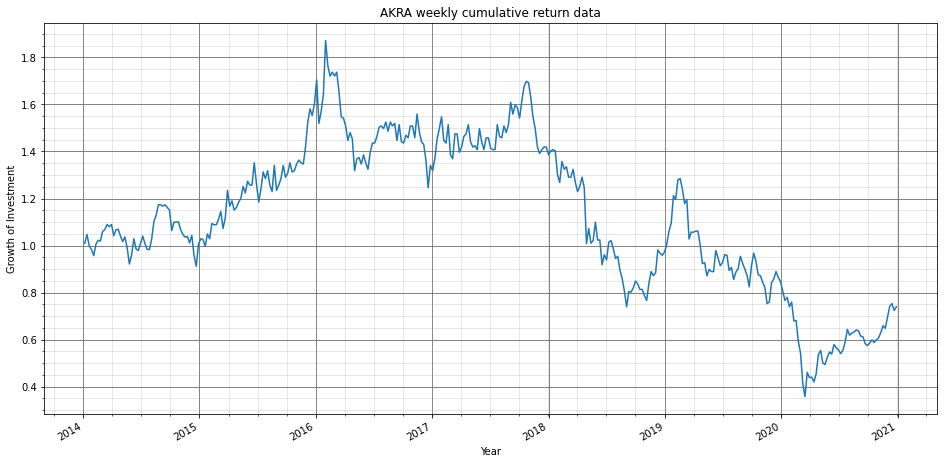

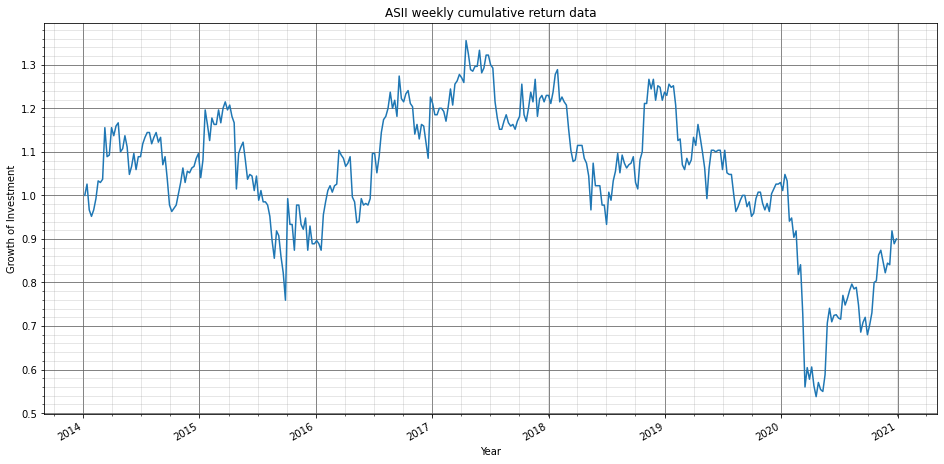

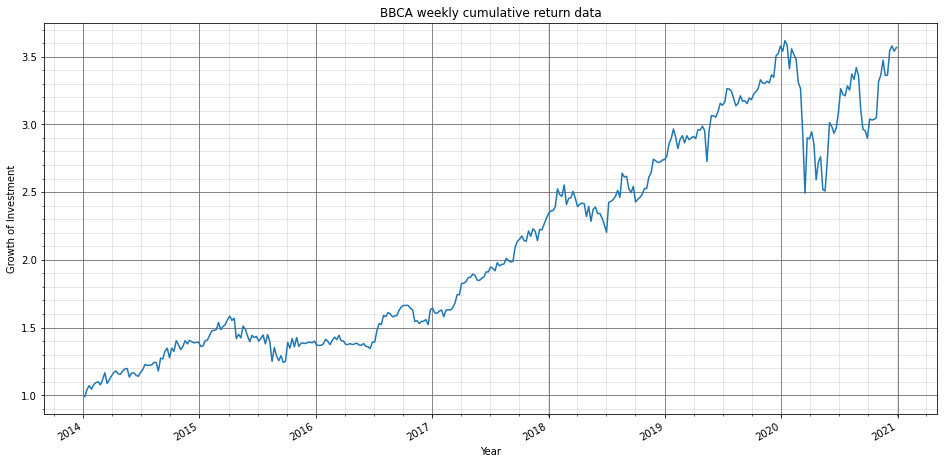

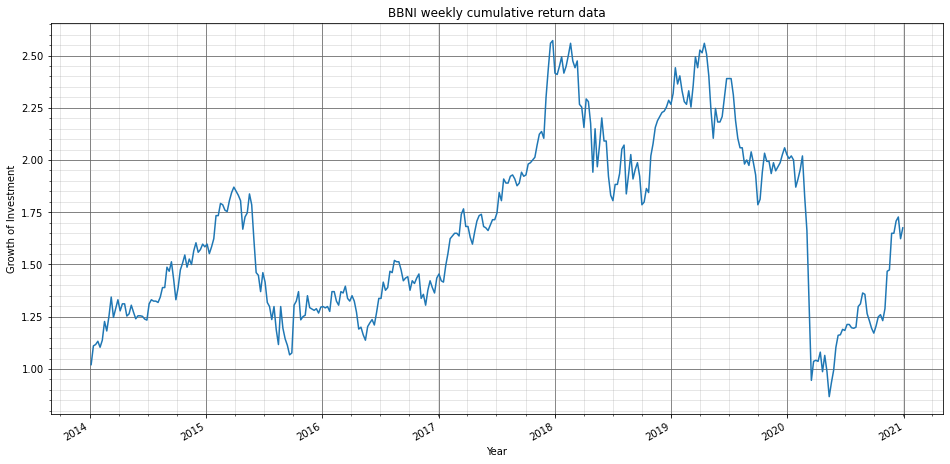

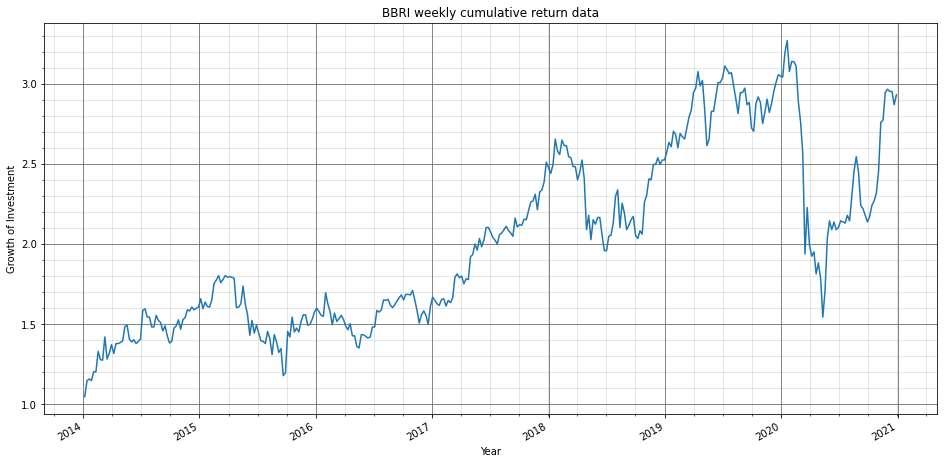

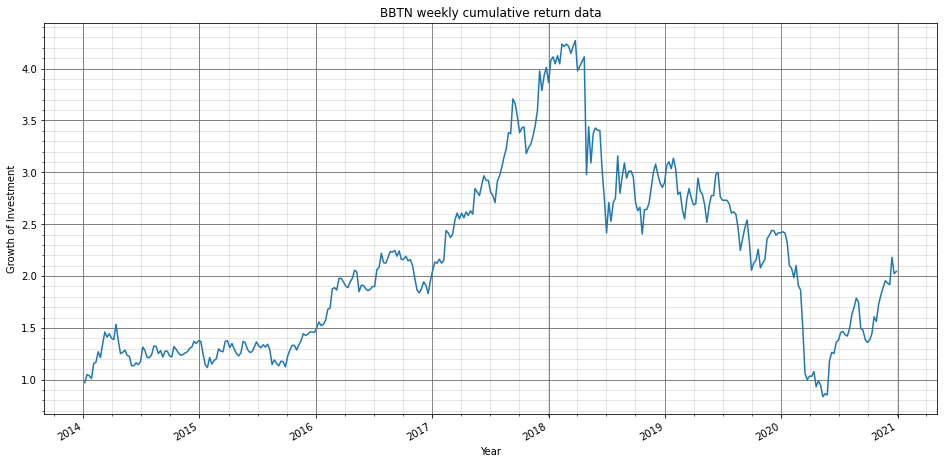

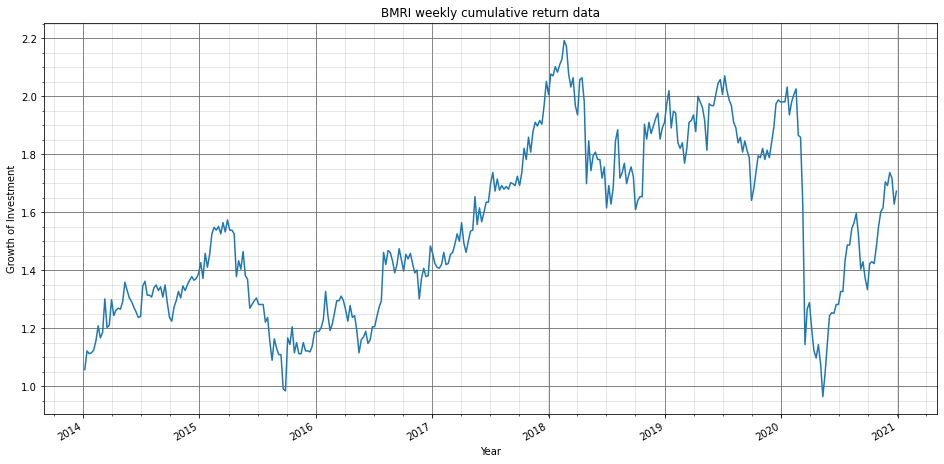

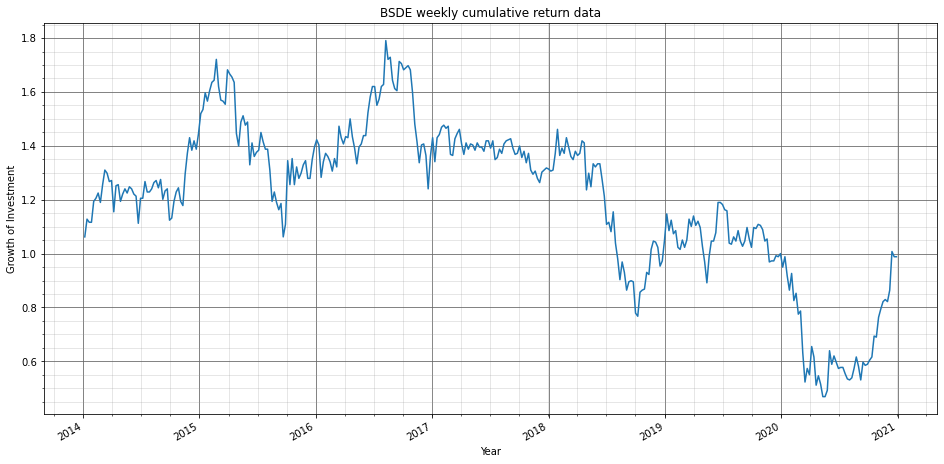

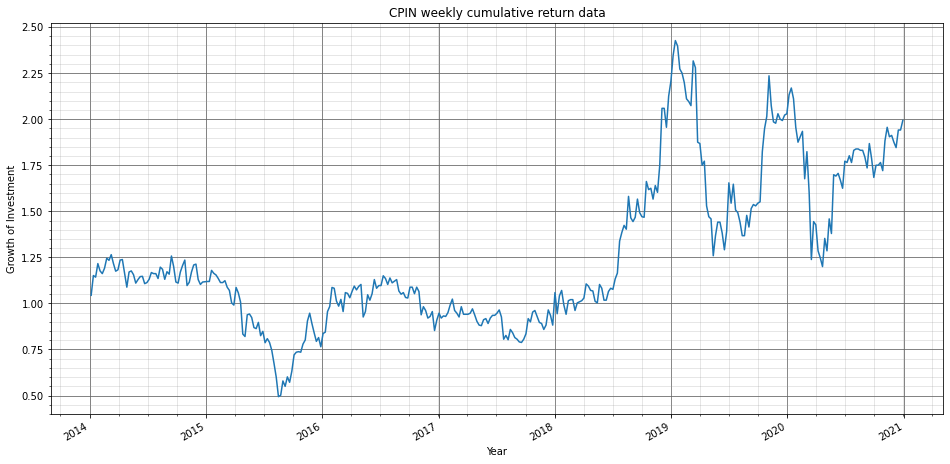

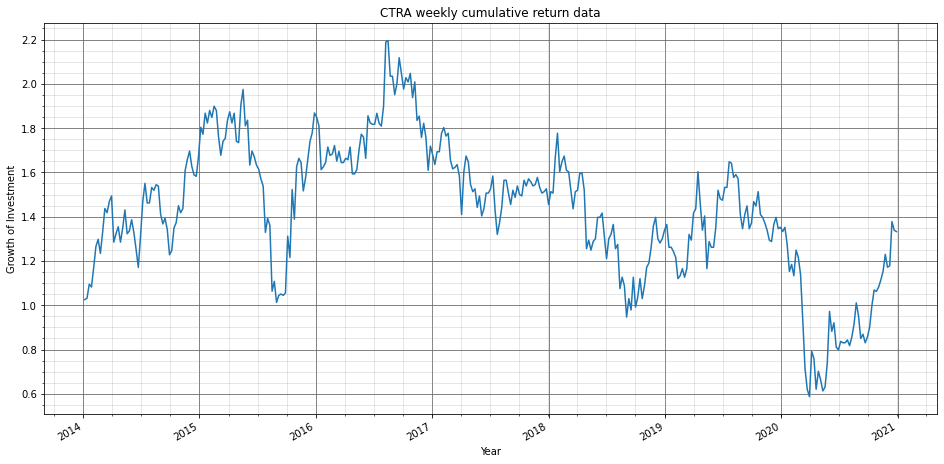

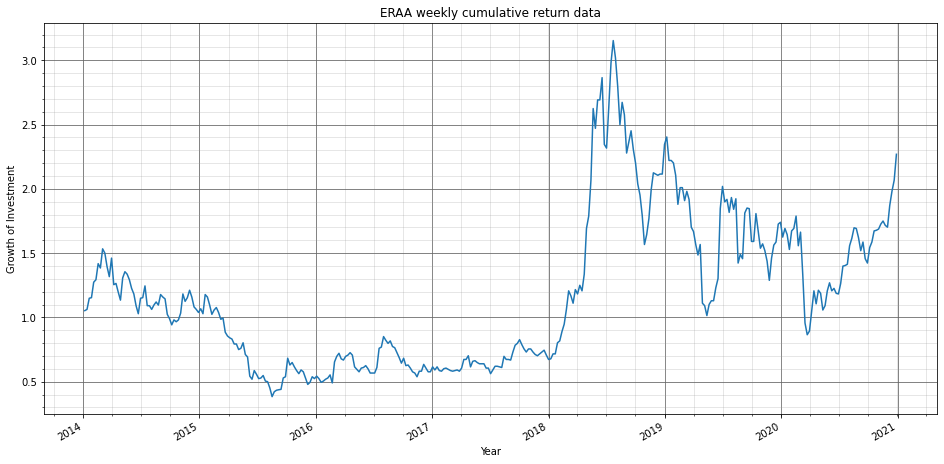

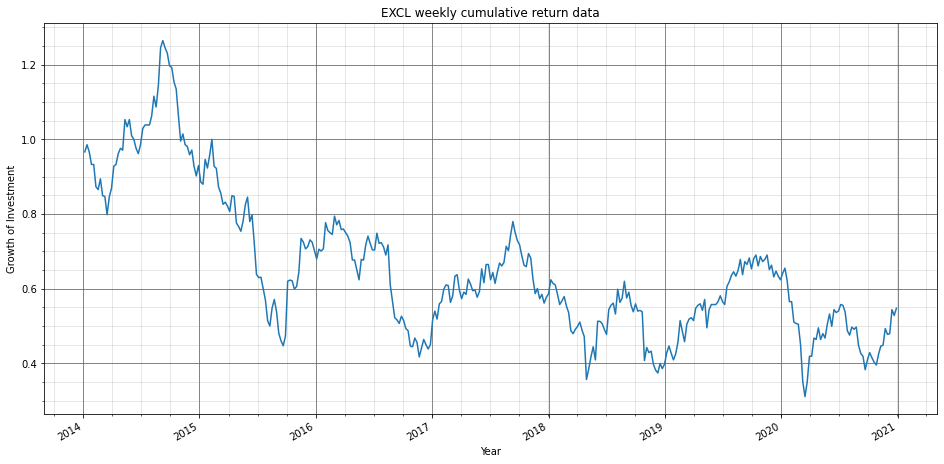

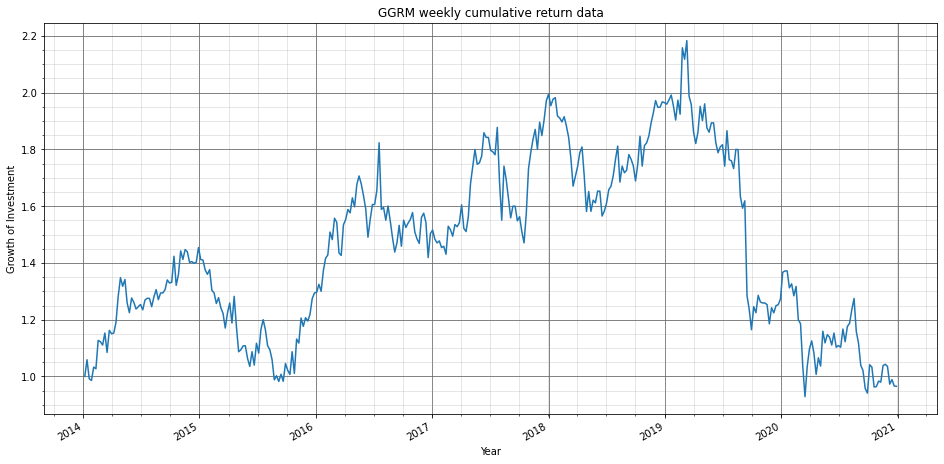

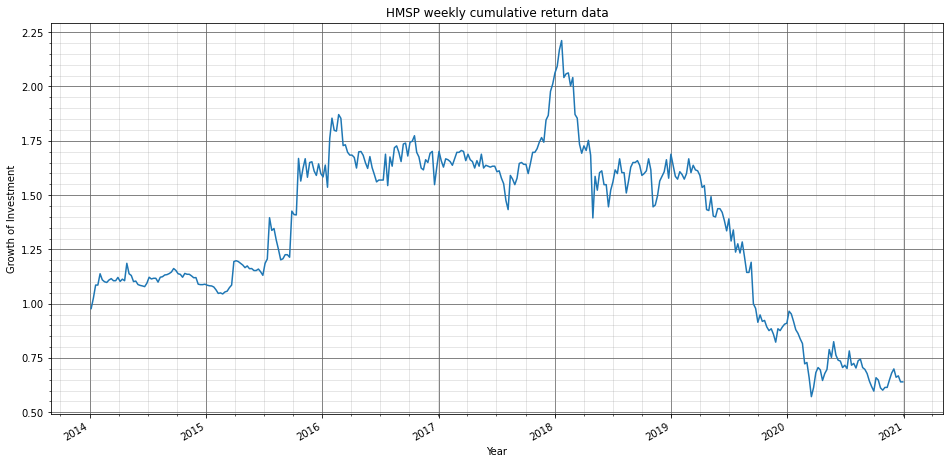

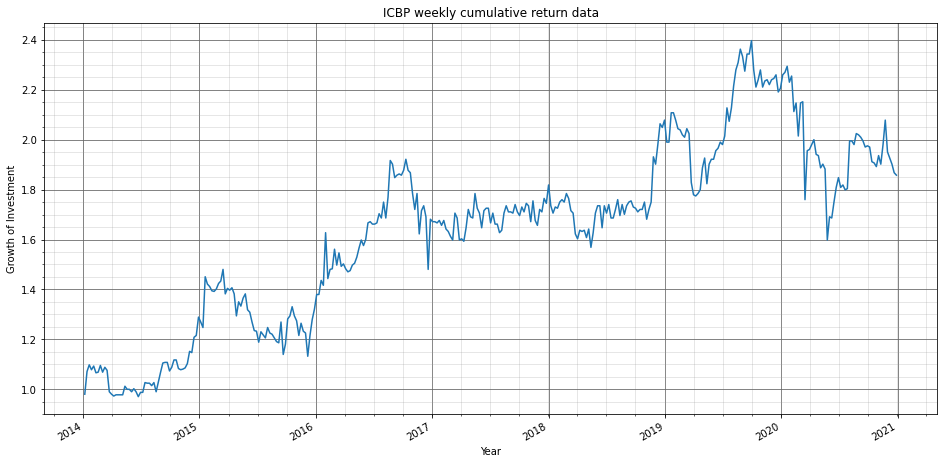

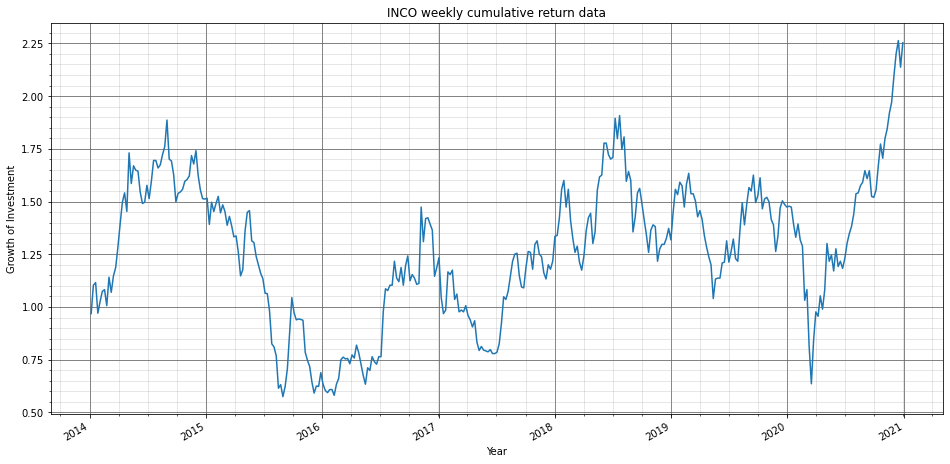

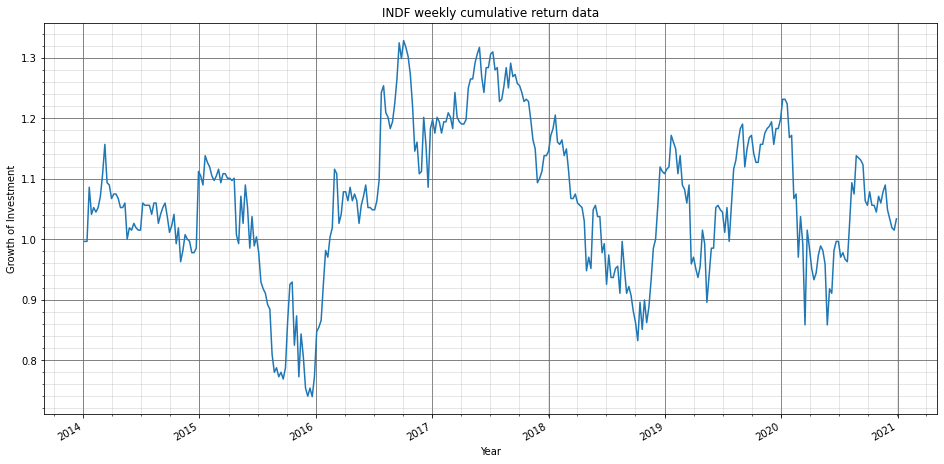

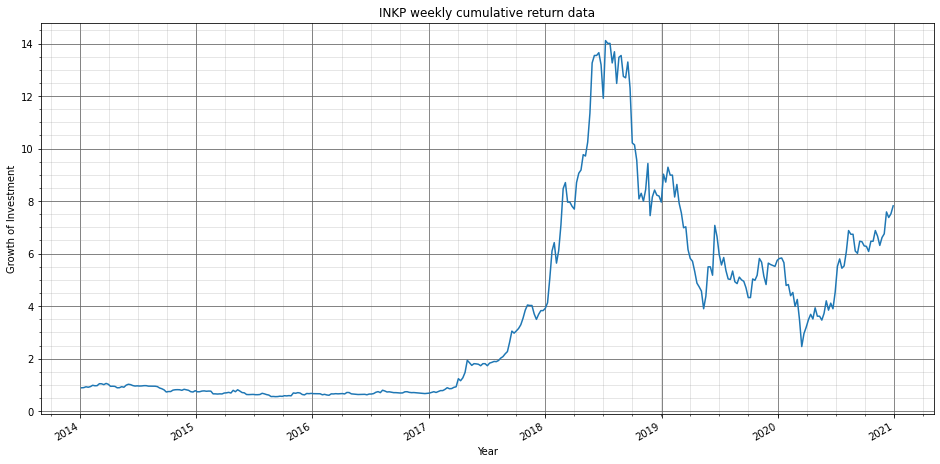

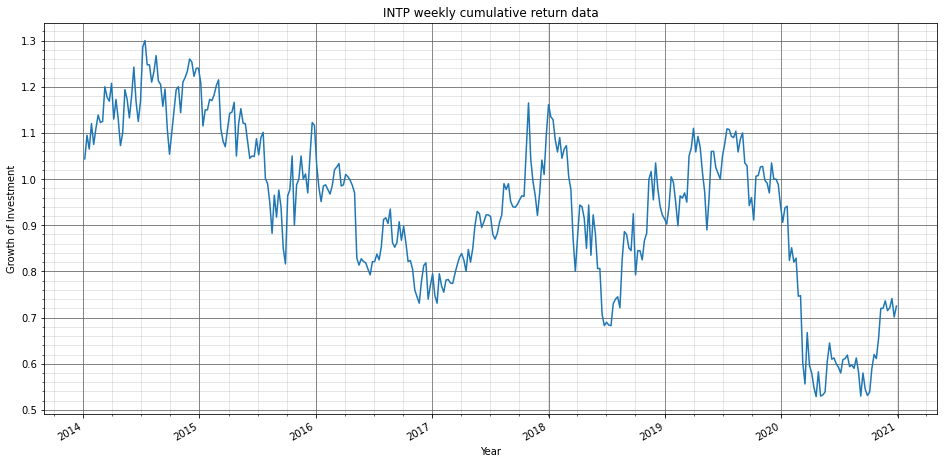

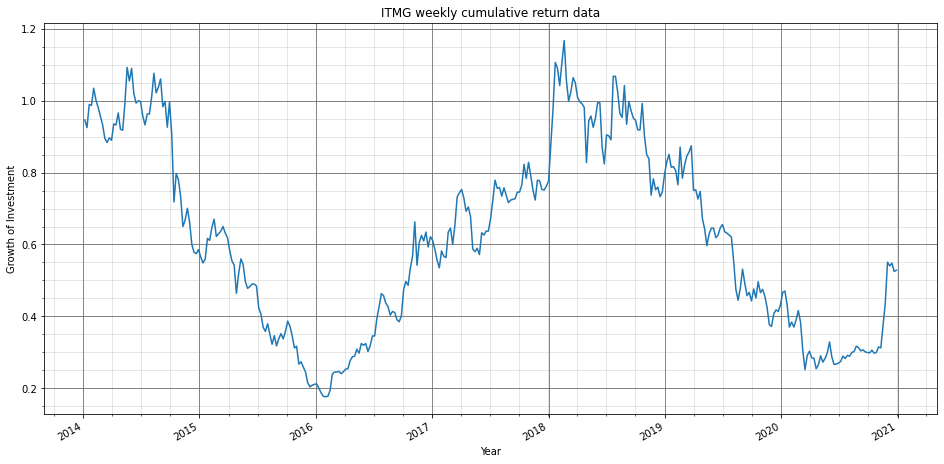

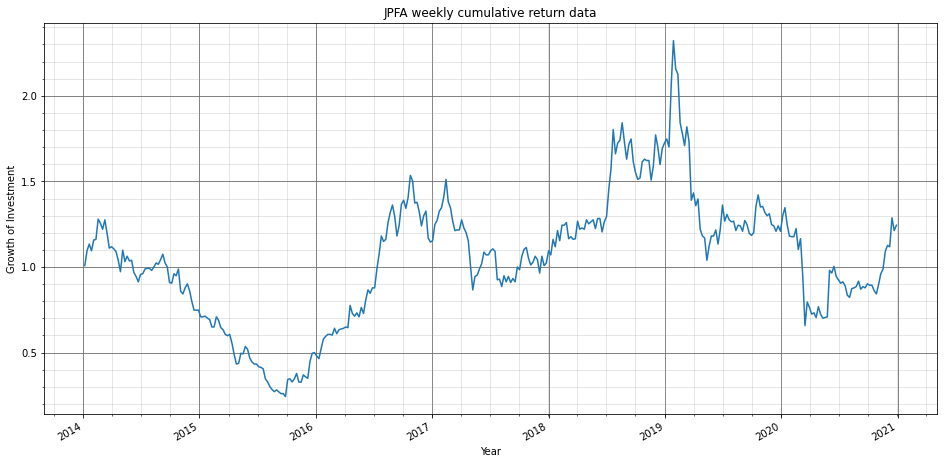

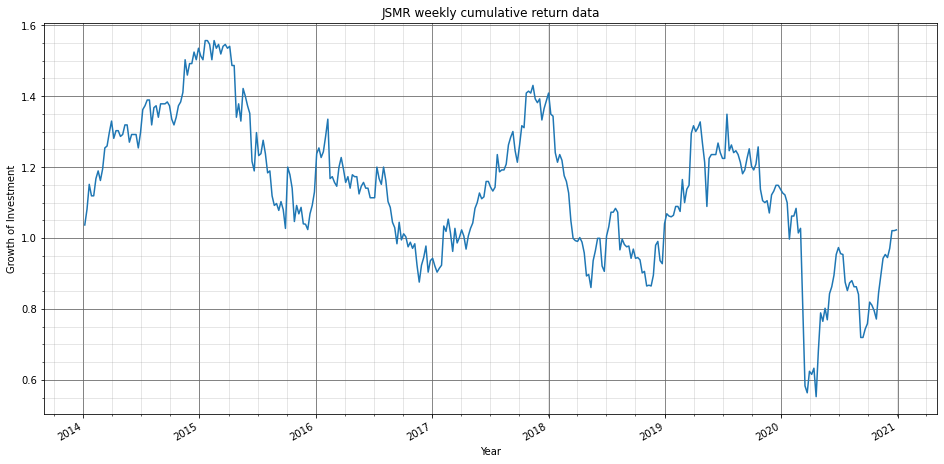

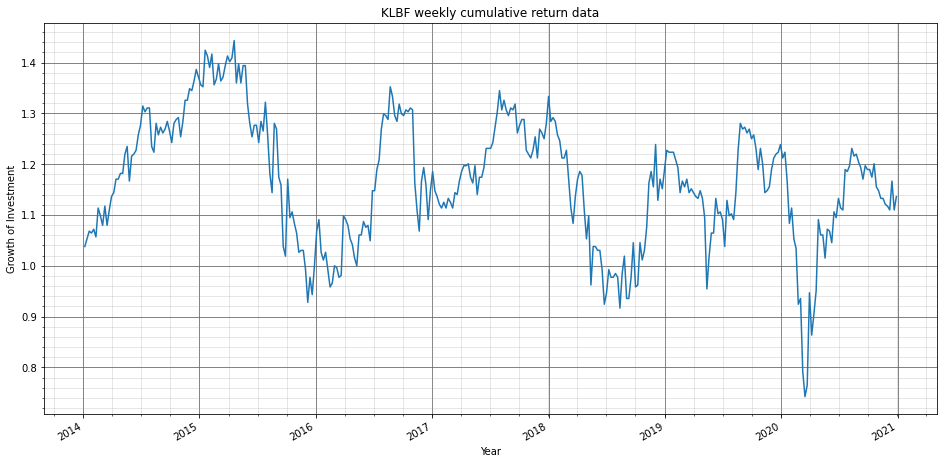

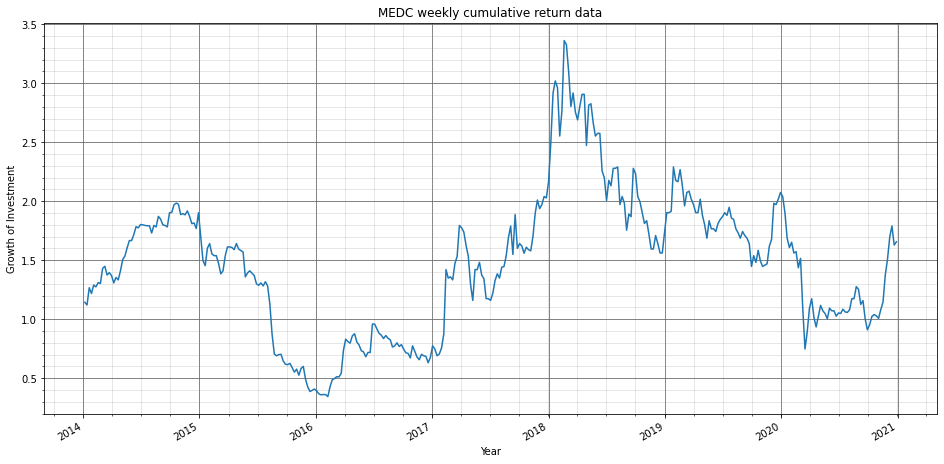

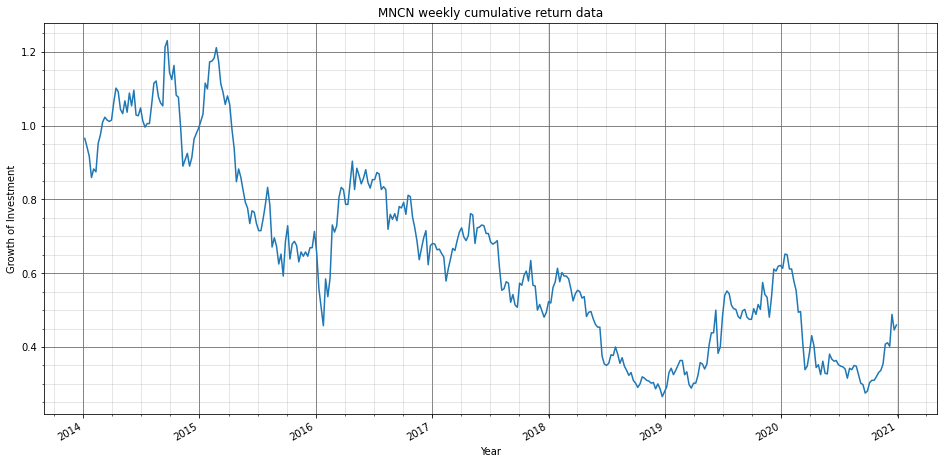

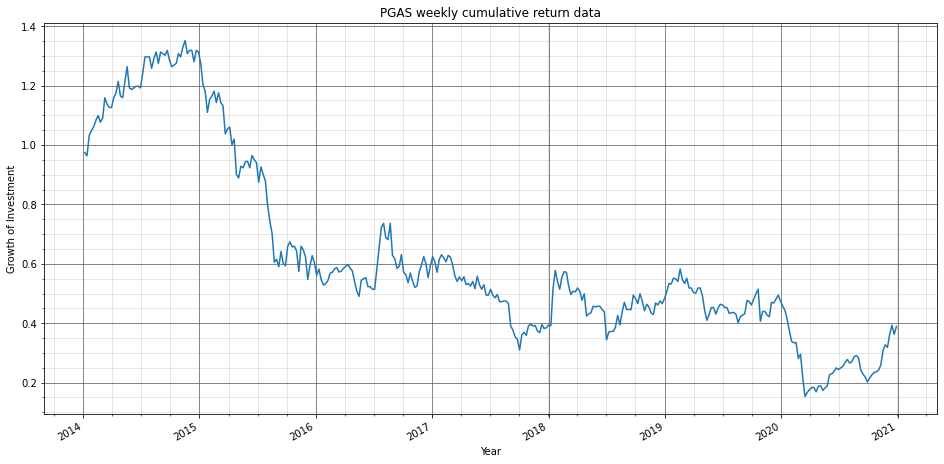

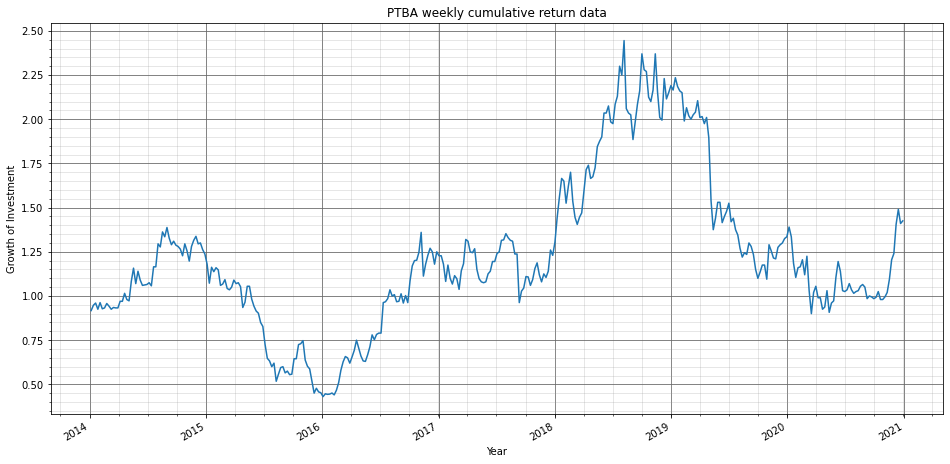

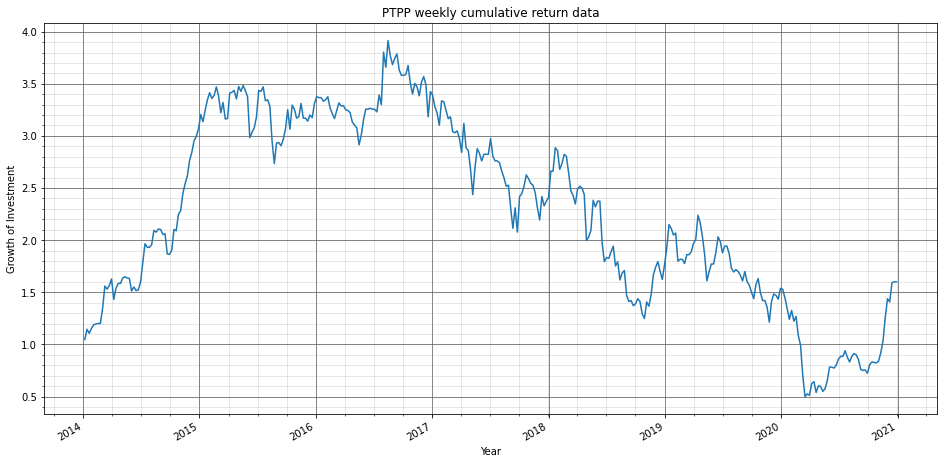

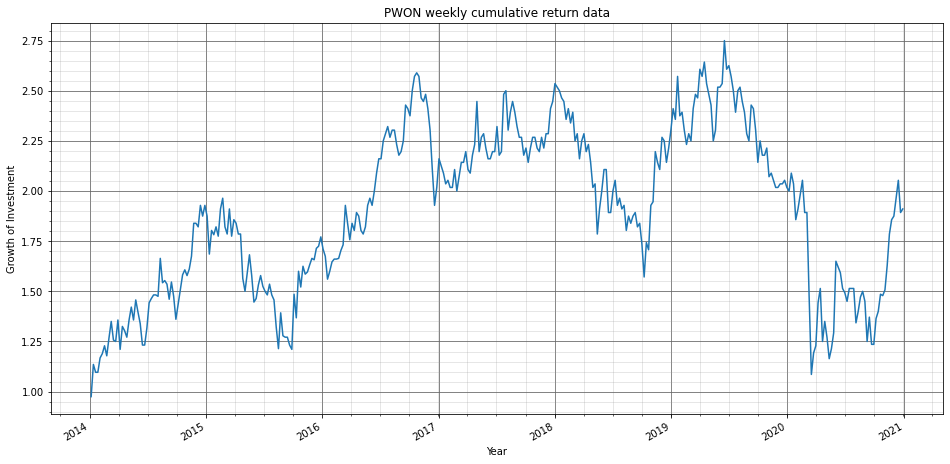

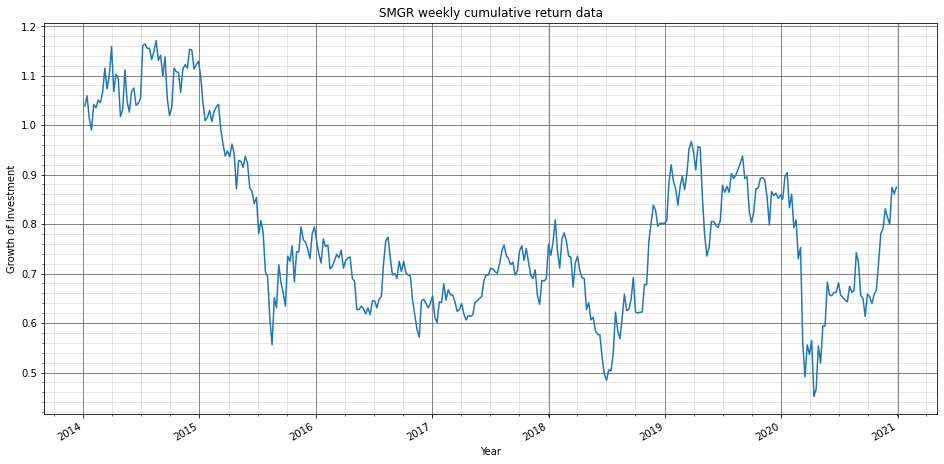

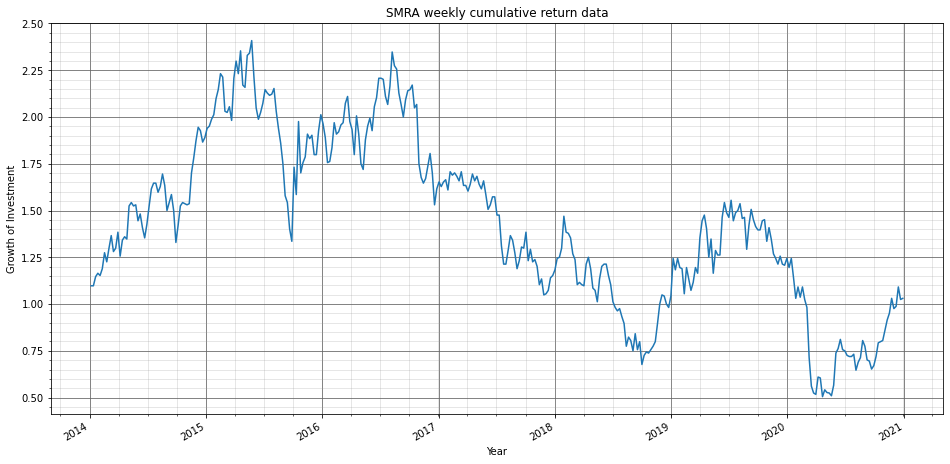

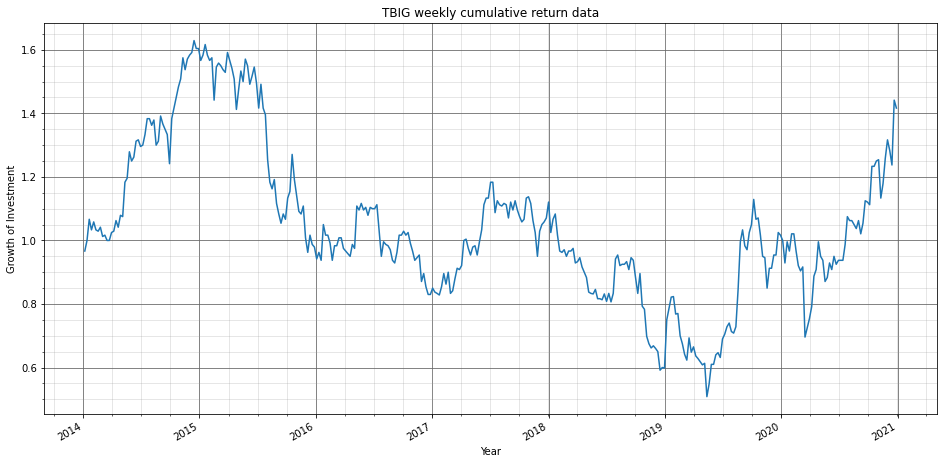

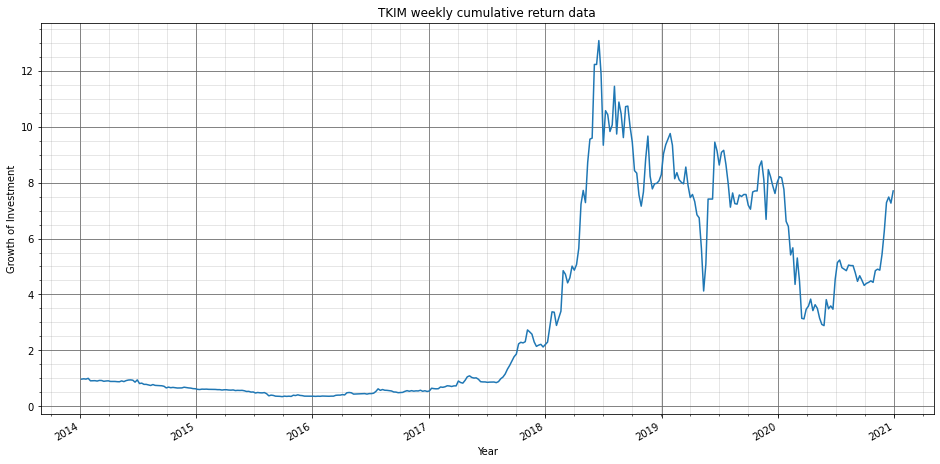

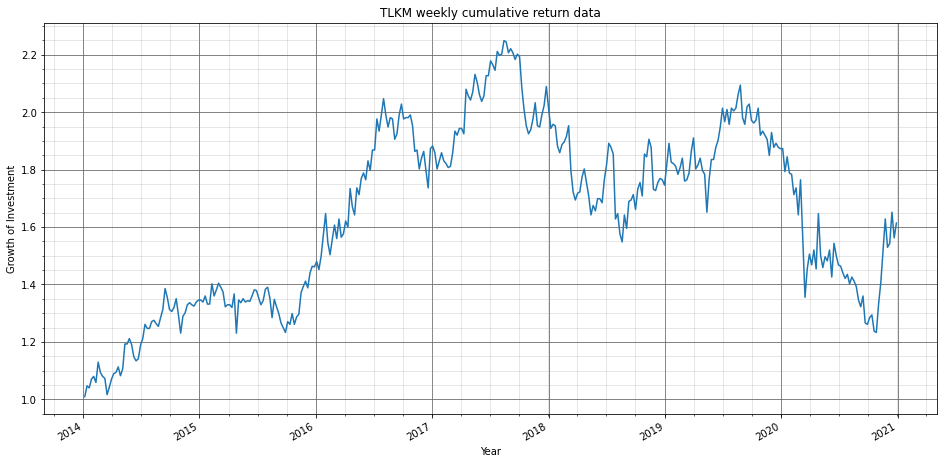

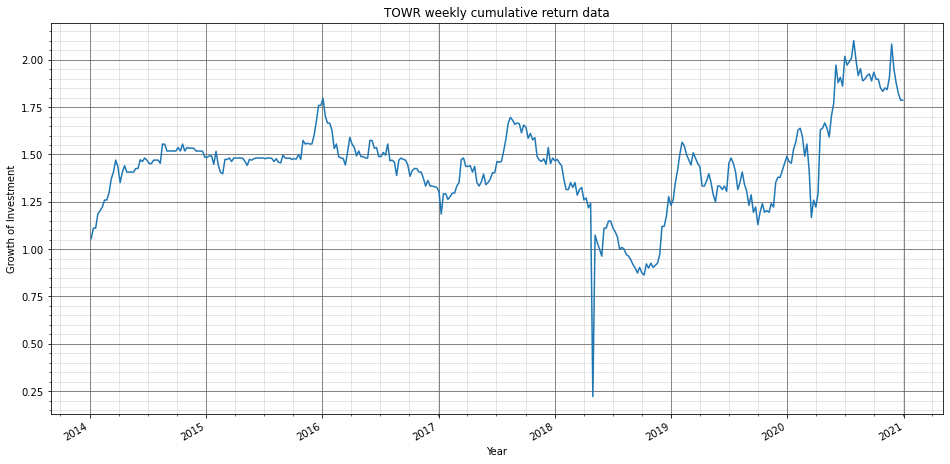

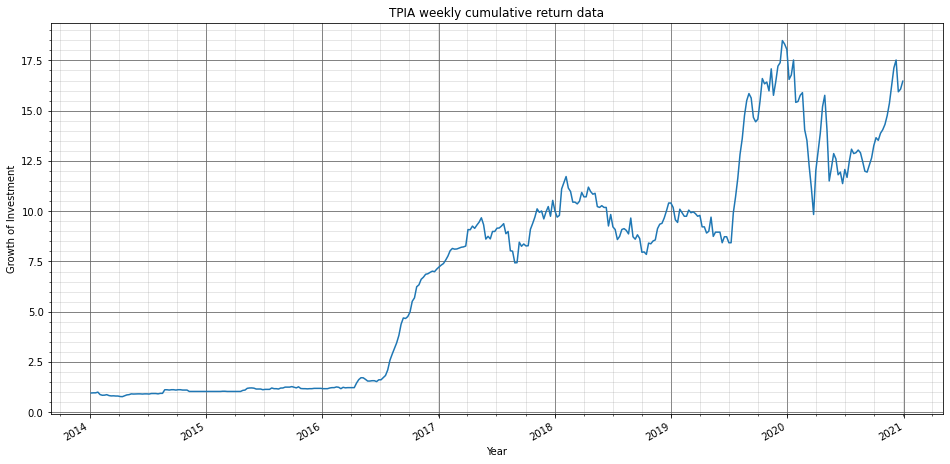

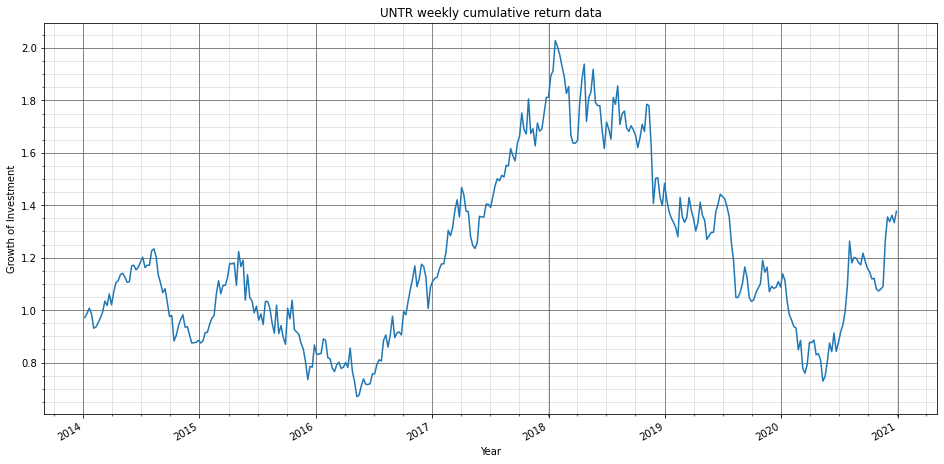

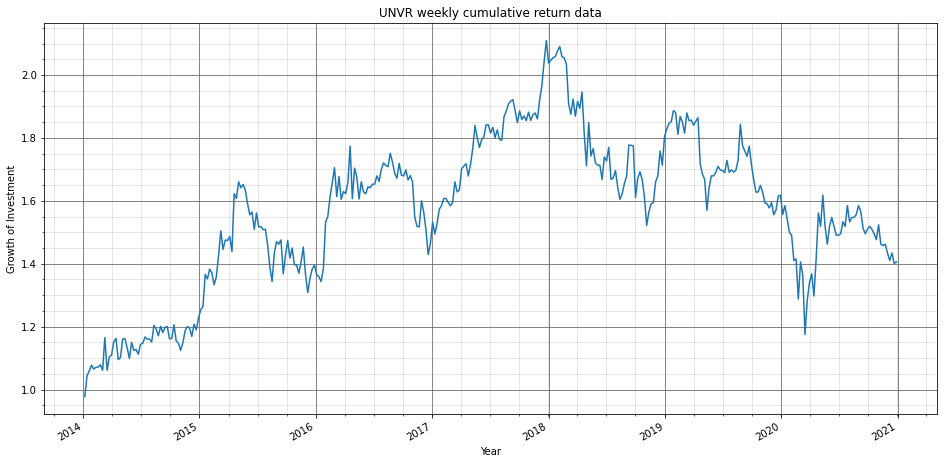

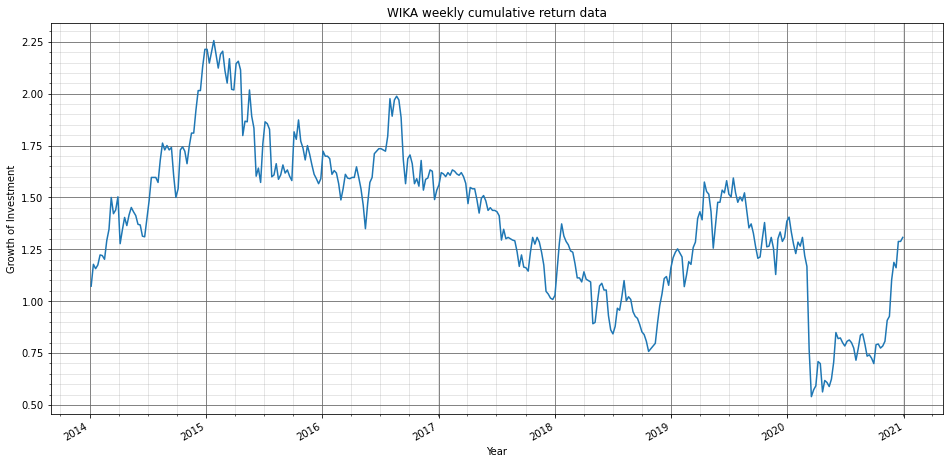

In [ ]:
for i in range(1, len(cum_returns_saham.columns)):
  
  saham = data.columns[i]
  plt.figure(figsize=(16,8))
  plt.title(str(saham)+" weekly cumulative return data")
  plt.grid(True,  which='major', color='#666666', linestyle='-')
  plt.plot(weeklydate, cum_returns_saham[saham])
  plt.xlabel('Year')
  plt.ylabel('Growth of Investment')
  plt.minorticks_on()
  plt.xticks(rotation = 50)
  plt.gcf().autofmt_xdate()
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
  plt.savefig(str(saham)+" weekly cumulative return data")
  plt.show()

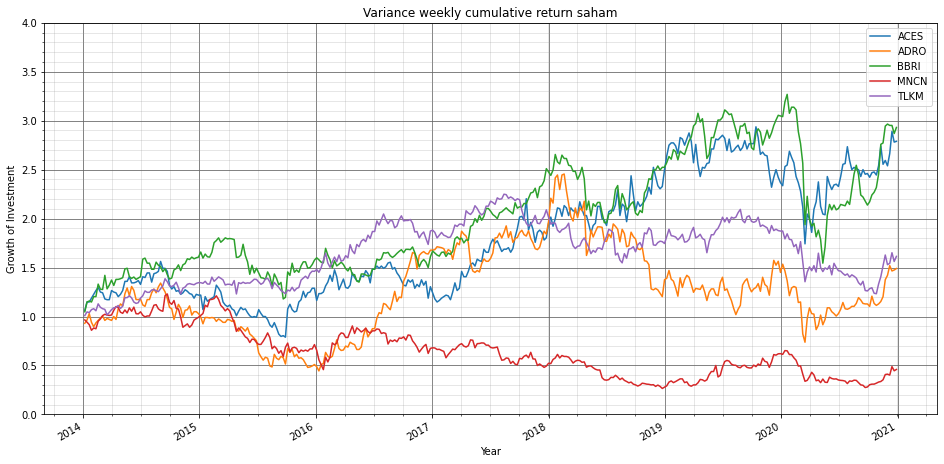

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Variance weekly cumulative return saham")
plt.grid(True,  which='major', color='#666666', linestyle='-')
plt.plot(weeklydate, cum_returns_saham['ACES'], label = "ACES")
plt.plot(weeklydate, cum_returns_saham['ADRO'], label = "ADRO") 
plt.plot(weeklydate, cum_returns_saham['BBRI'], label = "BBRI")
plt.plot(weeklydate, cum_returns_saham['MNCN'], label = "MNCN")
plt.plot(weeklydate, cum_returns_saham['TLKM'], label = "TLKM")
plt.ylim(0,4,0.5)
plt.xlabel('Year')
plt.ylabel('Growth of Investment')
plt.minorticks_on()
plt.xticks(rotation = 50)
plt.gcf().autofmt_xdate()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
plt.legend()
plt.savefig("Variance weekly cumulative return saham")
plt.show()

In [ ]:
return_saham.to_csv('ReturnSahamBaru.csv', index=False)
cum_returns_saham.to_csv('CumReturnSahamBaru.csv', index=False)

In [ ]:
from google.colab import files

for i in range(1, len(data.columns)):
  
  filename = data.columns[i]
  sample_name = str(filename)+" weekly cumulative return data.png"
  files.download(sample_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>